<a href="https://colab.research.google.com/github/samroeslin/National-Flood-Insurance-Program/blob/develop/Flood_data_2005_event_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploration of FEMA National Flood Insurance Program (NFIP) data

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Python 3
import sys
assert sys.version_info >= (3, 5)

# Common imports
import os
import numpy as np
import pandas as pd
#pd.set_option('float_format', '{:f}'.format)
#pd.options.display.float_format = "{:.2f}".format

import matplotlib.pyplot as plt
import matplotlib
from matplotlib import colors
%matplotlib inline

# from functools import reduce
# import itertools

import seaborn as sns
sns.set(style="ticks", color_codes=True)

import missingno as msno

print('numpy version:', np.__version__)
print('pandas version:', pd.__version__)
print('matplotlib version:', matplotlib.__version__)
print('seaborn version:', sns.__version__)
print('missingno version:', msno.__version__)
# print('scikit-learn version:', sklearn.__version__)

numpy version: 1.19.5
pandas version: 1.1.5
matplotlib version: 3.2.2
seaborn version: 0.11.1
missingno version: 0.4.2


# Data

Data obtained from [OpenFEMA Dataset: FIMA NFIP Redacted Claims](https://www.fema.gov/openfema-data-page/fima-nfip-redacted-claims)

For more information on flood insurance and the National Flood Insurance Program (NFIP) see https://www.fema.gov/flood-insurance

In [3]:
# Import data
df_raw = pd.read_csv('/content/drive/MyDrive/Data_Science/FEMA_NFIP/FIMA_NFIP_Redacted_Claims-v1.csv') #On Google Colab UoA
#df_raw = pd.read_csv('/homevol/sroe459/Data/FEMA/FIMA_NFIP_Redacted_Claims-v1.csv') #on VM

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (31) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2495983 entries, 0 to 2495982
Data columns (total 40 columns):
 #   Column                                      Dtype  
---  ------                                      -----  
 0   agricultureStructureIndicator               float64
 1   asOfDate                                    object 
 2   baseFloodElevation                          float64
 3   basementEnclosureCrawlspace                 float64
 4   reportedCity                                object 
 5   condominiumIndicator                        object 
 6   policyCount                                 float64
 7   countyCode                                  float64
 8   communityRatingSystemDiscount               float64
 9   dateOfLoss                                  object 
 10  elevatedBuildingIndicator                   float64
 11  elevationCertificateIndicator               float64
 12  elevationDifference                         float64
 13  censusTract                

In [5]:
# Shape
nRow, nCol = df_raw.shape
nRow = '{:,.0f}'.format(nRow)
print(f'There are {nRow} rows and {nCol} columns')

There are 2,495,983 rows and 40 columns


In [6]:
with pd.option_context('display.max_columns', 100):
    display(df_raw.head(10))

,agricultureStructureIndicator,asOfDate,baseFloodElevation,basementEnclosureCrawlspace,reportedCity,condominiumIndicator,policyCount,countyCode,communityRatingSystemDiscount,dateOfLoss,elevatedBuildingIndicator,elevationCertificateIndicator,elevationDifference,censusTract,floodZone,houseWorship,latitude,longitude,locationOfContents,lowestAdjacentGrade,lowestFloorElevation,numberOfFloorsInTheInsuredBuilding,nonProfitIndicator,obstructionType,occupancyType,originalConstructionDate,originalNBDate,amountPaidOnBuildingClaim,amountPaidOnContentsClaim,amountPaidOnIncreasedCostOfComplianceClaim,postFIRMConstructionIndicator,rateMethod,smallBusinessIndicatorBuilding,state,totalBuildingInsuranceCoverage,totalContentsInsuranceCoverage,yearOfLoss,reportedZipcode,primaryResidence,id
0,0.0,2020-11-01T23:58:45.858Z,NaN,1.0,DETROIT,N,1.0,26163.0,8.0,2014-08-11T04:00:00.000Z,0.0,NaN,NaN,2.616351e+10,B,0.0,42.4,-82.9,2.0,NaN,NaN,3.0,0.0,NaN,1.0,2040-01-01T05:00:00.000Z,2012-07-19T04:00:00.000Z,3507.13,NaN,NaN,0.0,Q,0.0,MI,250000.0,100000.0,2014,48215.0,1.0,5faad46bad3f68081876d038
1,0.0,2020-11-01T23:58:45.858Z,NaN,NaN,TRENTON,N,1.0,34021.0,NaN,1999-09-16T04:00:00.000Z,0.0,NaN,NaN,3.402100e+10,A04,0.0,40.2,-74.8,3.0,NaN,NaN,1.0,0.0,10.0,1.0,1950-07-01T04:00:00.000Z,1984-10-06T04:00:00.000Z,6389.31,NaN,NaN,0.0,1,0.0,NJ,166800.0,5900.0,1999,8638.0,1.0,5faad46bad3f68081876d046
2,0.0,2020-11-01T23:58:45.858Z,NaN,1.0,DETROIT,N,1.0,26163.0,8.0,2016-07-07T04:00:00.000Z,0.0,NaN,NaN,2.616351e+10,B,0.0,42.4,-82.9,2.0,NaN,NaN,3.0,0.0,NaN,1.0,2027-01-01T05:00:00.000Z,2013-01-16T05:00:00.000Z,1638.01,NaN,NaN,0.0,R,0.0,MI,75000.0,30000.0,2016,48215.0,0.0,5faad46bad3f68081876d03f
3,0.0,2020-11-01T23:58:45.858Z,NaN,2.0,DETROIT,N,1.0,26163.0,8.0,2014-08-11T04:00:00.000Z,0.0,NaN,NaN,2.616351e+10,B,0.0,42.4,-82.9,2.0,NaN,NaN,3.0,0.0,NaN,1.0,2022-01-01T05:00:00.000Z,2012-04-24T04:00:00.000Z,3651.57,NaN,NaN,0.0,Q,0.0,MI,250000.0,100000.0,2014,48215.0,1.0,5faad46bad3f68081876d043
4,0.0,2020-11-01T23:58:45.858Z,NaN,2.0,DETROIT,N,1.0,26163.0,8.0,2016-07-08T04:00:00.000Z,0.0,NaN,NaN,2.616351e+10,B,0.0,42.4,-82.9,2.0,NaN,NaN,2.0,0.0,NaN,1.0,2047-01-01T05:00:00.000Z,2012-04-26T04:00:00.000Z,3836.59,NaN,NaN,0.0,R,0.0,MI,150000.0,60000.0,2016,48215.0,1.0,5faad46bad3f68081876d036
5,0.0,2020-11-01T23:58:45.858Z,NaN,2.0,SCRANTON,N,1.0,42069.0,NaN,1985-09-27T04:00:00.000Z,0.0,NaN,NaN,4.206910e+10,A10,0.0,41.4,-75.7,4.0,NaN,NaN,2.0,0.0,10.0,1.0,1950-07-01T04:00:00.000Z,1984-10-05T04:00:00.000Z,3688.00,NaN,NaN,0.0,1,0.0,PA,35000.0,0.0,1985,18508.0,0.0,5faad46bad3f68081876d05b
6,0.0,2020-11-01T23:58:45.858Z,NaN,1.0,DETROIT,N,1.0,26163.0,8.0,2014-08-11T04:00:00.000Z,0.0,NaN,NaN,2.616351e+10,X,0.0,42.4,-82.9,2.0,NaN,NaN,3.0,0.0,NaN,1.0,1997-10-10T04:00:00.000Z,2013-11-08T05:00:00.000Z,8855.33,NaN,NaN,1.0,7,0.0,MI,20000.0,8000.0,2014,48215.0,1.0,5faad46bad3f68081876d05a
7,0.0,2020-11-01T23:58:45.858Z,NaN,NaN,DES ARC,N,1.0,5117.0,NaN,2011-05-02T04:00:00.000Z,1.0,NaN,NaN,5.117460e+09,A,0.0,35.0,-91.5,NaN,NaN,NaN,1.0,0.0,10.0,1.0,1957-09-05T04:00:00.000Z,2007-11-06T05:00:00.000Z,34500.00,NaN,NaN,0.0,1,0.0,AR,34500.0,0.0,2011,72040.0,1.0,5faad46bad3f68081876d03a
8,0.0,2020-11-01T23:58:45.858Z,NaN,2.0,DETROIT,N,1.0,26163.0,8.0,2019-05-01T04:00:00.000Z,0.0,NaN,NaN,2.616351e+10,X,0.0,42.4,-82.9,2.0,NaN,NaN,3.0,0.0,NaN,1.0,2045-01-01T05:00:00.000Z,2013-08-26T04:00:00.000Z,5071.85,1024.87,NaN,0.0,7,0.0,MI,150000.0,60000.0,2019,48215.0,1.0,5faad46bad3f68081876d047
9,0.0,2020-11-01T23:58:45.858Z,NaN,NaN,LA PORTE,N,1.0,48201.0,7.0,2007-08-17T04:00:00.000Z,0.0,NaN,NaN,4.820134e+10,X,0.0,29.7,-95.1,3.0,NaN,NaN,1.0,0.0,NaN,1.0,1958-01-01T05:00:00.000Z,2007-06-24T04:00:00.000Z,17934.47,6574.71,NaN,0.0,7,0.0,TX,100000.0,40000.0,2007,77571.0,1.0,5faad46bad3f68081876d063


In [7]:
with pd.option_context('display.max_columns', 100):
    display(df_raw.tail(10))

,agricultureStructureIndicator,asOfDate,baseFloodElevation,basementEnclosureCrawlspace,reportedCity,condominiumIndicator,policyCount,countyCode,communityRatingSystemDiscount,dateOfLoss,elevatedBuildingIndicator,elevationCertificateIndicator,elevationDifference,censusTract,floodZone,houseWorship,latitude,longitude,locationOfContents,lowestAdjacentGrade,lowestFloorElevation,numberOfFloorsInTheInsuredBuilding,nonProfitIndicator,obstructionType,occupancyType,originalConstructionDate,originalNBDate,amountPaidOnBuildingClaim,amountPaidOnContentsClaim,amountPaidOnIncreasedCostOfComplianceClaim,postFIRMConstructionIndicator,rateMethod,smallBusinessIndicatorBuilding,state,totalBuildingInsuranceCoverage,totalContentsInsuranceCoverage,yearOfLoss,reportedZipcode,primaryResidence,id
2495973,0.0,2020-11-01T23:58:45.858Z,NaN,NaN,VEGA BAJA,N,1.0,72145.0,NaN,2012-11-12T05:00:00.000Z,0.0,1.0,NaN,7.214556e+10,A07,0.0,18.4,-66.4,NaN,NaN,NaN,1.0,0.0,NaN,1.0,1970-01-01T05:00:00.000Z,2002-01-25T05:00:00.000Z,7536.31,NaN,NaN,0.0,1,0.0,PR,62400.0,0.0,2012,693.0,1.0,5faad640ad3f6808189ce5fd
2495974,0.0,2020-11-01T23:58:45.858Z,NaN,NaN,CANOVANAS,N,1.0,72029.0,NaN,2004-09-15T04:00:00.000Z,0.0,1.0,NaN,7.202910e+10,AE,0.0,18.4,-65.9,NaN,NaN,NaN,1.0,0.0,NaN,1.0,1970-01-01T05:00:00.000Z,2002-01-16T05:00:00.000Z,6981.20,NaN,NaN,0.0,1,0.0,PR,78000.0,0.0,2004,729.0,1.0,5faad640ad3f6808189ce5fe
2495975,0.0,2020-11-01T23:58:45.858Z,NaN,2.0,CAMBRIDGE,N,1.0,24019.0,6.0,2003-09-18T04:00:00.000Z,1.0,NaN,NaN,2.401997e+10,AE,0.0,38.6,-76.3,NaN,NaN,NaN,2.0,0.0,50.0,1.0,1958-07-01T04:00:00.000Z,2001-12-14T05:00:00.000Z,6018.95,NaN,NaN,0.0,1,0.0,MD,78000.0,0.0,2003,21613.0,0.0,5faad640ad3f6808189ce603
2495976,0.0,2020-11-01T23:58:45.858Z,NaN,NaN,MIAMI,N,1.0,12086.0,5.0,1999-10-15T04:00:00.000Z,0.0,2.0,NaN,1.208602e+10,AH,0.0,25.7,-80.4,NaN,NaN,NaN,1.0,0.0,10.0,1.0,1992-10-12T04:00:00.000Z,1999-09-08T04:00:00.000Z,5999.49,NaN,NaN,0.0,9,0.0,FL,65400.0,0.0,1999,33183.0,0.0,5faad640ad3f6808189ce60c
2495977,0.0,2020-11-01T23:58:45.858Z,NaN,NaN,RODANTHE,N,1.0,37055.0,7.0,1999-10-16T04:00:00.000Z,0.0,NaN,NaN,3.705597e+10,AE,0.0,35.6,-75.5,NaN,NaN,NaN,1.0,0.0,10.0,1.0,1976-01-01T05:00:00.000Z,1999-10-13T04:00:00.000Z,1811.19,NaN,NaN,0.0,1,0.0,NC,5000.0,0.0,1999,27968.0,1.0,5faad640ad3f6808189ce60e
2495978,0.0,2020-11-01T23:58:45.858Z,NaN,NaN,PHILADELPHIA,N,1.0,42017.0,NaN,1999-09-16T04:00:00.000Z,0.0,2.0,NaN,4.201710e+10,AE,0.0,40.2,-75.1,NaN,NaN,NaN,1.0,0.0,10.0,1.0,1992-10-12T04:00:00.000Z,1999-03-05T05:00:00.000Z,5544.25,NaN,NaN,0.0,9,0.0,PA,30800.0,0.0,1999,18976.0,0.0,5faad640ad3f6808189ce613
2495979,0.0,2020-11-01T23:58:45.858Z,NaN,NaN,LAUDERHILL,N,1.0,12011.0,7.0,1999-05-25T04:00:00.000Z,0.0,2.0,NaN,1.201106e+10,AH,0.0,26.2,-80.2,NaN,NaN,NaN,1.0,0.0,10.0,1.0,1992-10-12T04:00:00.000Z,1999-02-24T05:00:00.000Z,NaN,NaN,NaN,0.0,9,0.0,FL,86100.0,0.0,1999,33313.0,0.0,5faad640ad3f6808189ce618
2495980,0.0,2020-11-01T23:58:45.858Z,NaN,0.0,ORTING,N,1.0,53053.0,2.0,2006-11-06T05:00:00.000Z,0.0,NaN,NaN,5.305307e+10,C,0.0,47.1,-122.1,3.0,NaN,NaN,1.0,0.0,NaN,1.0,1980-07-01T04:00:00.000Z,2001-12-07T05:00:00.000Z,11538.31,1977.23,NaN,0.0,7,0.0,WA,150000.0,60000.0,2006,98360.0,0.0,5faad640ad3f6808189ce629
2495981,0.0,2020-11-01T23:58:45.858Z,NaN,NaN,LAFAYETTE,N,1.0,22055.0,8.0,1993-01-21T05:00:00.000Z,0.0,NaN,NaN,2.205500e+10,B,0.0,30.2,-92.0,3.0,NaN,NaN,1.0,0.0,10.0,1.0,1982-03-30T05:00:00.000Z,1992-09-16T04:00:00.000Z,4972.00,NaN,NaN,1.0,1,0.0,LA,185000.0,60000.0,1993,70503.0,0.0,5faad640ad3f6808189ce634
2495982,0.0,2020-11-01T23:58:45.858Z,NaN,NaN,HOMOSASSA,N,1.0,12017.0,NaN,1993-03-13T05:00:00.000Z,0.0,NaN,NaN,1.201745e+10,A,0.0,28.8,-82.6,4.0,NaN,NaN,2.0,0.0,10.0,1.0,1974-07-01T04:00:00.000Z,1991-07-03T04:00:00.000Z,7699.52,NaN,NaN,0.0,1,0.0,FL,60000.0,0.0,1993,34448.0,0.0,5faad640ad3f6808189ce63b


# Location

In [8]:
# Check missing values in latitude
df_raw['latitude'].isnull().value_counts()

False    2453803
True       42180
Name: latitude, dtype: int64

In [9]:
# Remove instances with missing latitude
df = df_raw.dropna(axis=0, subset=['latitude'])

In [10]:
# Check missing values in latitude
df['latitude'].isnull().value_counts()

False    2453803
Name: latitude, dtype: int64

In [11]:
# Check missing values in longitude
df['longitude'].isnull().value_counts()

False    2453803
Name: longitude, dtype: int64

In [12]:
# Shape
nRow, nCol = df.shape
nRow = '{:,.0f}'.format(nRow)
print(f'There are {nRow} rows and {nCol} columns')

There are 2,453,803 rows and 40 columns


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2453803 entries, 0 to 2495982
Data columns (total 40 columns):
 #   Column                                      Dtype  
---  ------                                      -----  
 0   agricultureStructureIndicator               float64
 1   asOfDate                                    object 
 2   baseFloodElevation                          float64
 3   basementEnclosureCrawlspace                 float64
 4   reportedCity                                object 
 5   condominiumIndicator                        object 
 6   policyCount                                 float64
 7   countyCode                                  float64
 8   communityRatingSystemDiscount               float64
 9   dateOfLoss                                  object 
 10  elevatedBuildingIndicator                   float64
 11  elevationCertificateIndicator               float64
 12  elevationDifference                         float64
 13  censusTract                

# Date of Loss

Date on which water first entered the insured building. When time is not specified in the field, it will default to T00:00:00.000Z

In [14]:
# Check missing values
df['dateOfLoss'].isnull().value_counts()

False    2453803
Name: dateOfLoss, dtype: int64

In [15]:
# Year of loss
df['dateOfLoss'].value_counts()

2005-08-29T04:00:00.000Z    184472
2012-10-29T04:00:00.000Z    126705
2008-09-13T04:00:00.000Z     43526
2011-08-28T04:00:00.000Z     32345
1995-05-08T04:00:00.000Z     31484
                             ...  
1975-06-08T04:00:00.000Z         1
1976-02-16T05:00:00.000Z         1
1979-10-27T04:00:00.000Z         1
1976-08-10T04:00:00.000Z         1
2020-01-19T05:00:00.000Z         1
Name: dateOfLoss, Length: 15871, dtype: int64

In [16]:
# new data frame with split value columns 
dateOfLoss_splited = df['dateOfLoss'].str.split("T", n = 1, expand = True) 

In [17]:
dateOfLoss_splited

,0,1
0,2014-08-11,04:00:00.000Z
1,1999-09-16,04:00:00.000Z
2,2016-07-07,04:00:00.000Z
3,2014-08-11,04:00:00.000Z
4,2016-07-08,04:00:00.000Z
...,...,...
2495978,1999-09-16,04:00:00.000Z
2495979,1999-05-25,04:00:00.000Z
2495980,2006-11-06,05:00:00.000Z
2495981,1993-01-21,05:00:00.000Z


In [18]:
df['EventDate'] = dateOfLoss_splited[0]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2453803 entries, 0 to 2495982
Data columns (total 41 columns):
 #   Column                                      Dtype  
---  ------                                      -----  
 0   agricultureStructureIndicator               float64
 1   asOfDate                                    object 
 2   baseFloodElevation                          float64
 3   basementEnclosureCrawlspace                 float64
 4   reportedCity                                object 
 5   condominiumIndicator                        object 
 6   policyCount                                 float64
 7   countyCode                                  float64
 8   communityRatingSystemDiscount               float64
 9   dateOfLoss                                  object 
 10  elevatedBuildingIndicator                   float64
 11  elevationCertificateIndicator               float64
 12  elevationDifference                         float64
 13  censusTract                

In [20]:
df[['dateOfLoss', 'EventDate']]

,dateOfLoss,EventDate
0,2014-08-11T04:00:00.000Z,2014-08-11
1,1999-09-16T04:00:00.000Z,1999-09-16
2,2016-07-07T04:00:00.000Z,2016-07-07
3,2014-08-11T04:00:00.000Z,2014-08-11
4,2016-07-08T04:00:00.000Z,2016-07-08
...,...,...
2495978,1999-09-16T04:00:00.000Z,1999-09-16
2495979,1999-05-25T04:00:00.000Z,1999-05-25
2495980,2006-11-06T05:00:00.000Z,2006-11-06
2495981,1993-01-21T05:00:00.000Z,1993-01-21


In [21]:
# Transform features expressing a date from object to Python datetime
pd.to_datetime(df['EventDate'], yearfirst=True)

0         2014-08-11
1         1999-09-16
2         2016-07-07
3         2014-08-11
4         2016-07-08
             ...    
2495978   1999-09-16
2495979   1999-05-25
2495980   2006-11-06
2495981   1993-01-21
2495982   1993-03-13
Name: EventDate, Length: 2453803, dtype: datetime64[ns]

In [22]:
df['EventDate'].describe()

count        2453803
unique         15871
top       2005-08-29
freq          184472
Name: EventDate, dtype: object

In [23]:
# First event in the dataset
df['EventDate'].min()

'1973-04-04'

In [24]:
# Last event in the dataset
df['EventDate'].max()

'2020-10-30'

In [25]:
# Rearrange column order to facilitate reading for humans
df = df[['latitude', 'longitude', 'state','countyCode', 'reportedCity', 'reportedZipcode', 'censusTract',
                         'yearOfLoss', 'EventDate',
                         'totalBuildingInsuranceCoverage', 'totalContentsInsuranceCoverage',
                         'amountPaidOnBuildingClaim', 'amountPaidOnContentsClaim', 'amountPaidOnIncreasedCostOfComplianceClaim',
                         'occupancyType', 'originalConstructionDate', 'condominiumIndicator', 'primaryResidence',
                         'nonProfitIndicator', 'smallBusinessIndicatorBuilding', 'houseWorship',
                         'floodZone', 'baseFloodElevation', 'elevatedBuildingIndicator',
                         'lowestAdjacentGrade', 'lowestFloorElevation',
                         'numberOfFloorsInTheInsuredBuilding',
                         'elevationCertificateIndicator', 'elevationDifference',
                         'basementEnclosureCrawlspace', 'obstructionType',
                         'locationOfContents', 'agricultureStructureIndicator', 'asOfDate',
                         'policyCount',  'communityRatingSystemDiscount',  'originalNBDate',
                         'postFIRMConstructionIndicator', 'rateMethod', 'id']]

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2453803 entries, 0 to 2495982
Data columns (total 40 columns):
 #   Column                                      Dtype  
---  ------                                      -----  
 0   latitude                                    float64
 1   longitude                                   float64
 2   state                                       object 
 3   countyCode                                  float64
 4   reportedCity                                object 
 5   reportedZipcode                             float64
 6   censusTract                                 float64
 7   yearOfLoss                                  int64  
 8   EventDate                                   object 
 9   totalBuildingInsuranceCoverage              float64
 10  totalContentsInsuranceCoverage              float64
 11  amountPaidOnBuildingClaim                   float64
 12  amountPaidOnContentsClaim                   float64
 13  amountPaidOnIncreasedCostOf

# Select instances for August 29, 2005 event (Hurricane Katrina)

In [27]:
# Select instances for August 29, 2005 event (Hurricane Katrina)
df_Katrina = df[df['EventDate'] == '2005-08-29']

In [28]:
# Shape of the data set related to event Katrina
nRow, nCol = df_Katrina.shape
nRow = '{:,.0f}'.format(nRow)
print(f'There are {nRow} rows and {nCol} columns')

There are 184,472 rows and 40 columns


In [29]:
df_Katrina.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 184472 entries, 1237 to 2495971
Data columns (total 40 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   latitude                                    184472 non-null  float64
 1   longitude                                   184472 non-null  float64
 2   state                                       184472 non-null  object 
 3   countyCode                                  184330 non-null  float64
 4   reportedCity                                184466 non-null  object 
 5   reportedZipcode                             184410 non-null  float64
 6   censusTract                                 183297 non-null  float64
 7   yearOfLoss                                  184472 non-null  int64  
 8   EventDate                                   184472 non-null  object 
 9   totalBuildingInsuranceCoverage              184472 non-null  float

In [30]:
df_Katrina.columns

Index(['latitude', 'longitude', 'state', 'countyCode', 'reportedCity',
       'reportedZipcode', 'censusTract', 'yearOfLoss', 'EventDate',
       'totalBuildingInsuranceCoverage', 'totalContentsInsuranceCoverage',
       'amountPaidOnBuildingClaim', 'amountPaidOnContentsClaim',
       'amountPaidOnIncreasedCostOfComplianceClaim', 'occupancyType',
       'originalConstructionDate', 'condominiumIndicator', 'primaryResidence',
       'nonProfitIndicator', 'smallBusinessIndicatorBuilding', 'houseWorship',
       'floodZone', 'baseFloodElevation', 'elevatedBuildingIndicator',
       'lowestAdjacentGrade', 'lowestFloorElevation',
       'numberOfFloorsInTheInsuredBuilding', 'elevationCertificateIndicator',
       'elevationDifference', 'basementEnclosureCrawlspace', 'obstructionType',
       'locationOfContents', 'agricultureStructureIndicator', 'asOfDate',
       'policyCount', 'communityRatingSystemDiscount', 'originalNBDate',
       'postFIRMConstructionIndicator', 'rateMethod', 'id'],
  

In [31]:
with pd.option_context('display.max_columns', 100):
    display(df_Katrina.head(10))

,latitude,longitude,state,countyCode,reportedCity,reportedZipcode,censusTract,yearOfLoss,EventDate,totalBuildingInsuranceCoverage,totalContentsInsuranceCoverage,amountPaidOnBuildingClaim,amountPaidOnContentsClaim,amountPaidOnIncreasedCostOfComplianceClaim,occupancyType,originalConstructionDate,condominiumIndicator,primaryResidence,nonProfitIndicator,smallBusinessIndicatorBuilding,houseWorship,floodZone,baseFloodElevation,elevatedBuildingIndicator,lowestAdjacentGrade,lowestFloorElevation,numberOfFloorsInTheInsuredBuilding,elevationCertificateIndicator,elevationDifference,basementEnclosureCrawlspace,obstructionType,locationOfContents,agricultureStructureIndicator,asOfDate,policyCount,communityRatingSystemDiscount,originalNBDate,postFIRMConstructionIndicator,rateMethod,id
1237,30.0,-90.2,LA,22051.0,HARAHAN,70123.0,2.205102e+10,2005,2005-08-29,200000.0,100000.0,NaN,NaN,NaN,4.0,1975-06-01T04:00:00.000Z,N,0.0,0.0,0.0,0.0,X,NaN,0.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,3.0,0.0,2020-11-01T23:58:45.858Z,1.0,8.0,1997-08-29T04:00:00.000Z,1.0,1,5faad46bad3f68081876d50f
1247,30.0,-90.3,LA,22051.0,KENNER,70062.0,2.205102e+10,2005,2005-08-29,163400.0,220500.0,96629.92,75000.00,NaN,4.0,1997-01-25T05:00:00.000Z,N,0.0,0.0,0.0,0.0,AE,3.0,0.0,0.0,3.0,1.0,NaN,0.0,NaN,NaN,3.0,0.0,2020-11-01T23:58:45.858Z,1.0,6.0,1997-07-25T04:00:00.000Z,1.0,1,5faad46bad3f68081876d507
1414,30.3,-89.8,LA,22103.0,SLIDELL,70458.0,2.210304e+10,2005,2005-08-29,117000.0,38600.0,117000.00,38600.00,NaN,1.0,1974-12-30T05:00:00.000Z,N,0.0,0.0,0.0,0.0,C,NaN,0.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,3.0,0.0,2020-11-01T23:58:45.858Z,1.0,7.0,1997-07-25T04:00:00.000Z,0.0,1,5faad46bad3f68081876d5cd
2270,30.0,-90.1,LA,22071.0,NEW ORLEANS,70118.0,2.207101e+10,2005,2005-08-29,250000.0,100000.0,105036.03,10927.64,NaN,2.0,2040-01-01T05:00:00.000Z,N,1.0,0.0,0.0,0.0,X,NaN,0.0,NaN,NaN,2.0,NaN,NaN,0.0,NaN,5.0,0.0,2020-11-01T23:58:45.858Z,1.0,8.0,1997-09-01T04:00:00.000Z,0.0,7,5faad46cad3f68081876d917
2295,30.0,-90.1,LA,22071.0,NEW ORLEANS,70122.0,2.207100e+10,2005,2005-08-29,100000.0,40000.0,11432.97,NaN,NaN,2.0,1950-01-01T05:00:00.000Z,N,0.0,0.0,0.0,0.0,X,NaN,0.0,NaN,NaN,1.0,NaN,NaN,0.0,NaN,3.0,0.0,2020-11-01T23:58:45.858Z,1.0,8.0,1997-09-01T04:00:00.000Z,0.0,7,5faad46cad3f68081876d935
4471,30.0,-90.0,LA,22071.0,NEW ORLEANS,70127.0,2.207100e+10,2005,2005-08-29,440000.0,0.0,440000.00,NaN,NaN,6.0,1984-06-01T04:00:00.000Z,N,0.0,0.0,0.0,0.0,A04,4.0,0.0,3.5,3.0,1.0,3.0,0.0,NaN,NaN,3.0,0.0,2020-11-01T23:58:45.858Z,1.0,8.0,2003-04-25T04:00:00.000Z,1.0,1,5faad46cad3f68081876e1c1
5593,30.1,-90.0,LA,22071.0,NEW ORLEANS,70128.0,2.207100e+10,2005,2005-08-29,140000.0,10000.0,NaN,0.00,NaN,1.0,1976-01-01T05:00:00.000Z,N,1.0,0.0,0.0,0.0,AOB,1.0,0.0,0.0,1.0,1.0,NaN,0.0,NaN,NaN,3.0,0.0,2020-11-01T23:58:45.858Z,1.0,8.0,2001-05-02T04:00:00.000Z,1.0,1,5faad46cad3f68081876e634
18819,30.2,-87.8,AL,1003.0,GULF SHORES,36542.0,1.003011e+09,2005,2005-08-29,115000.0,22100.0,5031.07,301.22,NaN,1.0,1978-07-01T04:00:00.000Z,N,0.0,0.0,0.0,0.0,A08,8.0,1.0,0.0,13.0,1.0,3.0,6.0,NaN,10.0,3.0,0.0,2020-11-01T23:58:45.858Z,1.0,8.0,1995-07-21T04:00:00.000Z,1.0,1,5faad46ead3f6808187719af
21393,30.0,-90.2,LA,22051.0,KENNER,70065.0,2.205102e+10,2005,2005-08-29,500000.0,0.0,7740.94,NaN,NaN,4.0,1985-07-01T04:00:00.000Z,N,0.0,0.0,0.0,0.0,AE,3.0,0.0,0.0,3.0,1.0,3.0,0.0,NaN,10.0,NaN,0.0,2020-11-01T23:58:45.858Z,1.0,6.0,1996-09-24T04:00:00.000Z,1.0,1,5faad46ead3f6808187723f2
21410,30.0,-90.2,LA,22051.0,KENNER,70065.0,2.205102e+10,2005,2005-08-29,500000.0,0.0,19993.31,NaN,NaN,4.0,1985-07-01T04:00:00.000Z,N,0.0,0.0,0.0,0.0,A02,3.0,0.0,0.0,3.0,1.0,3.0,0.0,NaN,10.0,NaN,0.0,2020-11-01T23:58:45.858Z,1.0,6.0,1996-09-24T04:00:00.000Z,1.0,1,5faad46ead3f6808187723fc


In [32]:
with pd.option_context('display.max_columns', 100):
    display(df_Katrina.tail(10))

,latitude,longitude,state,countyCode,reportedCity,reportedZipcode,censusTract,yearOfLoss,EventDate,totalBuildingInsuranceCoverage,totalContentsInsuranceCoverage,amountPaidOnBuildingClaim,amountPaidOnContentsClaim,amountPaidOnIncreasedCostOfComplianceClaim,occupancyType,originalConstructionDate,condominiumIndicator,primaryResidence,nonProfitIndicator,smallBusinessIndicatorBuilding,houseWorship,floodZone,baseFloodElevation,elevatedBuildingIndicator,lowestAdjacentGrade,lowestFloorElevation,numberOfFloorsInTheInsuredBuilding,elevationCertificateIndicator,elevationDifference,basementEnclosureCrawlspace,obstructionType,locationOfContents,agricultureStructureIndicator,asOfDate,policyCount,communityRatingSystemDiscount,originalNBDate,postFIRMConstructionIndicator,rateMethod,id
2430475,30.0,-90.1,LA,22071.0,NEW ORLEANS,70124.0,2.207101e+10,2005,2005-08-29,138900.0,30700.0,NaN,NaN,NaN,1.0,1965-01-01T05:00:00.000Z,N,1.0,0.0,0.0,0.0,V16,NaN,0.0,NaN,NaN,3.0,1.0,NaN,NaN,NaN,4.0,0.0,2020-10-27T17:56:33.967Z,1.0,8.0,2005-08-01T04:00:00.000Z,0.0,1,5faad631ad3f6808189be397
2430633,30.4,-90.1,LA,22103.0,COVINGTON,70433.0,2.210304e+10,2005,2005-08-29,250000.0,27600.0,4140.64,NaN,NaN,1.0,1979-01-01T05:00:00.000Z,N,1.0,0.0,0.0,0.0,AE,13.0,1.0,5.0,17.0,2.0,3.0,4.0,NaN,10.0,4.0,0.0,2020-11-01T23:58:45.858Z,1.0,8.0,2004-09-23T04:00:00.000Z,0.0,1,5faad631ad3f6808189be0a8
2430948,30.0,-90.1,LA,22071.0,NEW ORLEANS,70124.0,2.207101e+10,2005,2005-08-29,138900.0,30700.0,NaN,NaN,NaN,1.0,1965-01-01T05:00:00.000Z,N,1.0,0.0,0.0,0.0,V16,NaN,0.0,NaN,NaN,3.0,1.0,NaN,NaN,NaN,4.0,0.0,2020-10-27T17:56:33.967Z,1.0,8.0,2005-08-01T04:00:00.000Z,0.0,1,5faad631ad3f6808189be396
2431074,30.0,-90.1,LA,22071.0,NEW ORLEANS,70124.0,2.207101e+10,2005,2005-08-29,145000.0,32000.0,145000.00,32000.0,15000.0,1.0,1965-01-01T05:00:00.000Z,N,1.0,0.0,0.0,0.0,V16,NaN,0.0,NaN,NaN,3.0,1.0,NaN,NaN,NaN,4.0,0.0,2020-11-01T23:58:45.858Z,1.0,8.0,2005-08-01T04:00:00.000Z,0.0,1,5faad631ad3f6808189be8ad
2495450,30.0,-90.1,LA,22071.0,NEW ORLEANS,70117.0,2.207100e+10,2005,2005-08-29,40000.0,0.0,40000.00,NaN,NaN,1.0,2047-06-01T04:00:00.000Z,N,1.0,0.0,0.0,0.0,AE,NaN,0.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,3.0,0.0,2020-11-01T23:58:45.858Z,1.0,8.0,1999-10-19T04:00:00.000Z,0.0,1,5faad640ad3f6808189ce455
2495650,30.0,-90.0,LA,22071.0,NEW ORLEANS,70126.0,2.207100e+10,2005,2005-08-29,91300.0,21000.0,91300.00,21000.0,11040.0,1.0,1956-07-01T04:00:00.000Z,N,1.0,0.0,0.0,0.0,A07,NaN,0.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,3.0,0.0,2020-11-01T23:58:45.858Z,1.0,8.0,2001-07-24T04:00:00.000Z,0.0,1,5faad640ad3f6808189ce564
2495674,30.0,-90.1,LA,22071.0,NEW ORLEANS,70122.0,2.207100e+10,2005,2005-08-29,14600.0,0.0,14500.00,NaN,NaN,1.0,2040-07-01T04:00:00.000Z,N,1.0,0.0,0.0,0.0,A02,NaN,0.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,0.0,2020-11-01T23:58:45.858Z,1.0,8.0,2001-06-09T04:00:00.000Z,0.0,1,5faad640ad3f6808189ce55f
2495814,30.0,-90.2,LA,22051.0,KENNER,70065.0,2.205102e+10,2005,2005-08-29,50000.0,10000.0,50000.00,10000.0,30000.0,1.0,1959-01-11T05:00:00.000Z,N,1.0,0.0,0.0,0.0,AE,NaN,0.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,3.0,0.0,2020-11-01T23:58:45.858Z,1.0,7.0,2000-02-25T05:00:00.000Z,0.0,1,5faad640ad3f6808189ce594
2495846,30.0,-90.2,LA,22051.0,JEFFERSON,70121.0,2.205102e+10,2005,2005-08-29,100000.0,15700.0,NaN,NaN,NaN,1.0,2049-01-01T05:00:00.000Z,N,1.0,0.0,0.0,0.0,AE,NaN,0.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,3.0,0.0,2020-11-01T23:58:45.858Z,1.0,5.0,1999-06-05T04:00:00.000Z,0.0,1,5faad640ad3f6808189ce593
2495971,30.3,-89.8,LA,22103.0,SLIDELL,70460.0,2.210304e+10,2005,2005-08-29,40000.0,0.0,15381.76,NaN,NaN,1.0,1974-01-01T05:00:00.000Z,N,1.0,0.0,0.0,0.0,AE,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,15.0,NaN,0.0,2020-11-01T23:58:45.858Z,1.0,9.0,2002-01-30T05:00:00.000Z,0.0,1,5faad640ad3f6808189ce638


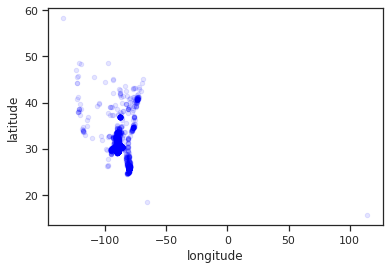

In [33]:
# Plot the instances
df_Katrina.plot(kind="scatter", x="longitude", y="latitude", color='blue', alpha=0.1)

It seems that one point is located outside the US.

In [34]:
df_Katrina['longitude'].describe()

count    184472.000000
mean        -89.860963
std           1.101750
min        -134.600000
25%         -90.100000
50%         -90.100000
75%         -89.900000
max         114.400000
Name: longitude, dtype: float64

In [35]:
#Explore single instance with Long = 114.4
df_Katrina[df_Katrina['longitude'] == 114.4]

,latitude,longitude,state,countyCode,reportedCity,reportedZipcode,censusTract,yearOfLoss,EventDate,totalBuildingInsuranceCoverage,totalContentsInsuranceCoverage,amountPaidOnBuildingClaim,amountPaidOnContentsClaim,amountPaidOnIncreasedCostOfComplianceClaim,occupancyType,originalConstructionDate,condominiumIndicator,primaryResidence,nonProfitIndicator,smallBusinessIndicatorBuilding,houseWorship,floodZone,baseFloodElevation,elevatedBuildingIndicator,lowestAdjacentGrade,lowestFloorElevation,numberOfFloorsInTheInsuredBuilding,elevationCertificateIndicator,elevationDifference,basementEnclosureCrawlspace,obstructionType,locationOfContents,agricultureStructureIndicator,asOfDate,policyCount,communityRatingSystemDiscount,originalNBDate,postFIRMConstructionIndicator,rateMethod,id
885249,15.5,114.4,LA,NaN,NEW ORLEANS,70116.0,NaN,2005,2005-08-29,25000.0,0.0,25000.0,NaN,NaN,2.0,1950-01-01T05:00:00.000Z,N,0.0,0.0,0.0,0.0,AE,1.0,1.0,0.1,3.0,1.0,3.0,2.0,0.0,10.0,NaN,0.0,2020-11-01T23:58:45.858Z,1.0,8.0,2002-07-26T04:00:00.000Z,0.0,1,5faad4f0ad3f6808188452ea


In [36]:
#Drop single instance with Long = 114.4
df_Katrina = df_Katrina[df_Katrina['longitude'] != 114.4]

In [37]:
df_Katrina['longitude'].describe()

count    184471.000000
mean        -89.862070
std           0.993823
min        -134.600000
25%         -90.100000
50%         -90.100000
75%         -89.900000
max         -66.000000
Name: longitude, dtype: float64

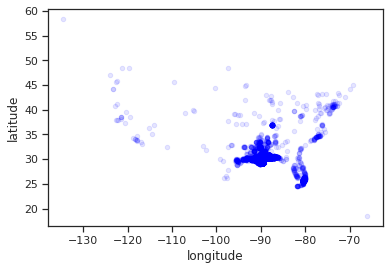

In [38]:
# Plot the instances
df_Katrina.plot(kind="scatter", x="longitude", y="latitude", color='blue', alpha=0.1)

In [39]:
df_Katrina['latitude'].describe()

count    184471.000000
mean         30.039638
std           0.506300
min          18.400000
25%          30.000000
50%          30.000000
75%          30.000000
max          58.400000
Name: latitude, dtype: float64

# State

In [40]:
# Check missing values
df_Katrina['state'].isnull().value_counts()

False    184471
Name: state, dtype: int64

In [41]:
df_Katrina['state'].value_counts()

LA    160206
MS     17326
AL      5384
FL      1176
KY        92
TX        81
NC        47
NY        25
CA        20
NJ        12
PA        11
GA        11
VA         9
WV         8
CT         7
SC         6
MO         4
OH         4
IN         4
WA         4
KS         3
IL         3
ME         2
TN         2
MI         2
MD         2
OR         2
AZ         2
CO         2
NV         1
IA         1
MA         1
VT         1
MT         1
AR         1
UN         1
MN         1
NM         1
AK         1
PR         1
ND         1
WI         1
NH         1
Name: state, dtype: int64

Only select instances in Louisiana (LA), Mississippi (MS), Alabama (AL), and Florida (FL).

In [42]:
# Only select instances in Louisiana (LA), Mississippi (MS), Alabama (AL), and Florida (FL)
df_Katrina = df_Katrina.loc[df_Katrina['state'].isin(['LA','MS','AL','FL'])]

In [43]:
df_Katrina['state'].value_counts()

LA    160206
MS     17326
AL      5384
FL      1176
Name: state, dtype: int64

# County Code 

FIPS code uniquely identifying the primary County (e.g., 011 represents Broward County) associated with the project. Note, the County Code field may not reflect the individual county the property is located as projects can be associated with more than one county

In [44]:
# Check missing values
df_Katrina['countyCode'].isnull().value_counts()

False    183951
True        141
Name: countyCode, dtype: int64

In [45]:
# Remove rows with missing information
df_Katrina.dropna(subset=['countyCode'], inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [46]:
# Check missing values
df_Katrina['countyCode'].isnull().value_counts()

False    183951
Name: countyCode, dtype: int64

In [47]:
# County
df_Katrina['countyCode'].value_counts(dropna=False)

22071.0    65111
22051.0    57037
22103.0    16174
22087.0    14669
28047.0     7271
           ...  
28127.0        1
28107.0        1
28101.0        1
28095.0        1
6.0            1
Name: countyCode, Length: 148, dtype: int64

# Reported City
This is the city of the insured property as reported to us by our Write Your Own (WYO) partners

In [48]:
# Check missing values
df_Katrina['reportedCity'].isnull().value_counts()

False    183945
True          6
Name: reportedCity, dtype: int64

In [49]:
# Remove instances with missing information about city
df_Katrina.dropna(axis=0, subset=['reportedCity'], inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [50]:
# Check missing values
df_Katrina['reportedCity'].isnull().value_counts()

False    183945
Name: reportedCity, dtype: int64

In [51]:
# City
df_Katrina['reportedCity'].value_counts(dropna=False)

NEW ORLEANS           65148
METAIRIE              24584
SLIDELL               12361
KENNER                11023
CHALMETTE              7492
                      ...  
MARKS                     1
PALM BEACH GARDENS        1
METAIRIA                  1
NEW ORLEAONS              1
YSCLOSKY                  1
Name: reportedCity, Length: 847, dtype: int64

In [52]:
# City
df_Katrina['reportedCity'].value_counts(dropna=False).head(60)

NEW ORLEANS       65148
METAIRIE          24584
SLIDELL           12361
KENNER            11023
CHALMETTE          7492
MARRERO            5242
HARVEY             4724
GRETNA             4534
BAY ST LOUIS       2709
PASS CHRISTIAN     2504
BILOXI             2502
ARABI              2443
MERAUX             1999
MANDEVILLE         1786
GULFPORT           1646
VIOLET             1638
OCEAN SPRINGS      1481
PASCAGOULA         1401
GULF SHORES        1346
RIVER RIDGE        1293
MOBILE             1258
WAVELAND           1129
JEFFERSON          1063
GRAND ISLE         1055
BELLE CHASSE       1006
LONG BEACH          988
DAUPHIN ISLAND      946
SAINT BERNARD       937
HARAHAN             849
BURAS               753
WESTWEGO            707
COVINGTON           703
DESTREHAN           625
LA PLACE            597
LACOMBE             595
GAUTIER             588
AVONDALE            566
PORT SULPHUR        542
TERRYTOWN           485
MOSS POINT          482
MIAMI               401
DIAMONDHEAD     

In [53]:
df_Katrina['reportedCity']

1237           HARAHAN
1247            KENNER
1414           SLIDELL
2270       NEW ORLEANS
2295       NEW ORLEANS
              ...     
2495650    NEW ORLEANS
2495674    NEW ORLEANS
2495814         KENNER
2495846      JEFFERSON
2495971        SLIDELL
Name: reportedCity, Length: 183945, dtype: object

In [54]:
# Set all city name to upper case
df_Katrina['reportedCity'] = df_Katrina['reportedCity'].str.upper() 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [55]:
# City
df_Katrina['reportedCity'].value_counts(dropna=False).head(70)

NEW ORLEANS      65299
METAIRIE         24590
SLIDELL          12374
KENNER           11045
CHALMETTE         7494
                 ...  
BARATARIA          110
ABITA SPRINGS       98
PICAYUNE            96
JACKSON             89
HOMESTEAD           89
Name: reportedCity, Length: 70, dtype: int64

# ZIP Code
5-digit Postal Zip Code of the insured property

In [56]:
# Check missing values
df_Katrina['reportedZipcode'].isnull().value_counts()

False    183885
True         60
Name: reportedZipcode, dtype: int64

In [57]:
# Remove rows with missing information
df_Katrina.dropna(subset=['reportedZipcode'], inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [58]:
# Zip code
df_Katrina['reportedZipcode'].value_counts(dropna=False)

70065.0    9440
70122.0    8832
70043.0    7492
70126.0    7377
70003.0    7373
           ... 
71028.0       1
71037.0       1
35528.0       1
71102.0       1
32908.0       1
Name: reportedZipcode, Length: 739, dtype: int64

# Census Tract
US Census Bureau defined census Tracts; statistical subdivisions of a county or equivalent entity that are updated prior to each decennial census. The NFIP relies on our geocoding service to assign census tract code. 11-digit code defining census tract

In [59]:
# Check missing values
df_Katrina['censusTract'].isnull().value_counts()

False    182861
True       1024
Name: censusTract, dtype: int64

In [60]:
# Remove rows with missing information
df_Katrina.dropna(subset=['censusTract'], inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [61]:
# Check missing values
df_Katrina['censusTract'].isnull().value_counts()

False    182861
Name: censusTract, dtype: int64

In [62]:
# Set census tract number as integer
df_Katrina['censusTract'] = df_Katrina['censusTract'].astype('int64') 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [63]:
# Census tract
df_Katrina['censusTract'].value_counts()

22103040802    2181
28045030300    2177
22051020203    1843
22071001725    1635
28047003000    1581
               ... 
12127090902       1
12033000800       1
12087971001       1
12105014203       1
1097007200        1
Name: censusTract, Length: 1448, dtype: int64

Map with census tracts:
https://geomap.ffiec.gov/FFIECGeocMap/GeocodeMap1.aspx

In [64]:
# Census tract
df_Katrina['censusTract'].value_counts().tail(1330)

22051023600    507
22071007501    507
22071002503    501
22051021400    500
22071012300    498
              ... 
12127090902      1
12033000800      1
12087971001      1
12105014203      1
1097007200       1
Name: censusTract, Length: 1330, dtype: int64

In [65]:
# Select only instances with 100 or more claims by tract
df_Katrina = df_Katrina.groupby("censusTract").filter(lambda x: len(x) >= 100)

In [66]:
# Census tract
df_Katrina['censusTract'].value_counts()

22103040802    2181
28045030300    2177
22051020203    1843
22071001725    1635
28047003000    1581
               ... 
22089062800     103
22103040704     100
22071006900     100
22071008200     100
22071012900     100
Name: censusTract, Length: 380, dtype: int64

In [67]:
df_Katrina.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 173879 entries, 1237 to 2495971
Data columns (total 40 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   latitude                                    173879 non-null  float64
 1   longitude                                   173879 non-null  float64
 2   state                                       173879 non-null  object 
 3   countyCode                                  173879 non-null  float64
 4   reportedCity                                173879 non-null  object 
 5   reportedZipcode                             173879 non-null  float64
 6   censusTract                                 173879 non-null  int64  
 7   yearOfLoss                                  173879 non-null  int64  
 8   EventDate                                   173879 non-null  object 
 9   totalBuildingInsuranceCoverage              173879 non-null  float

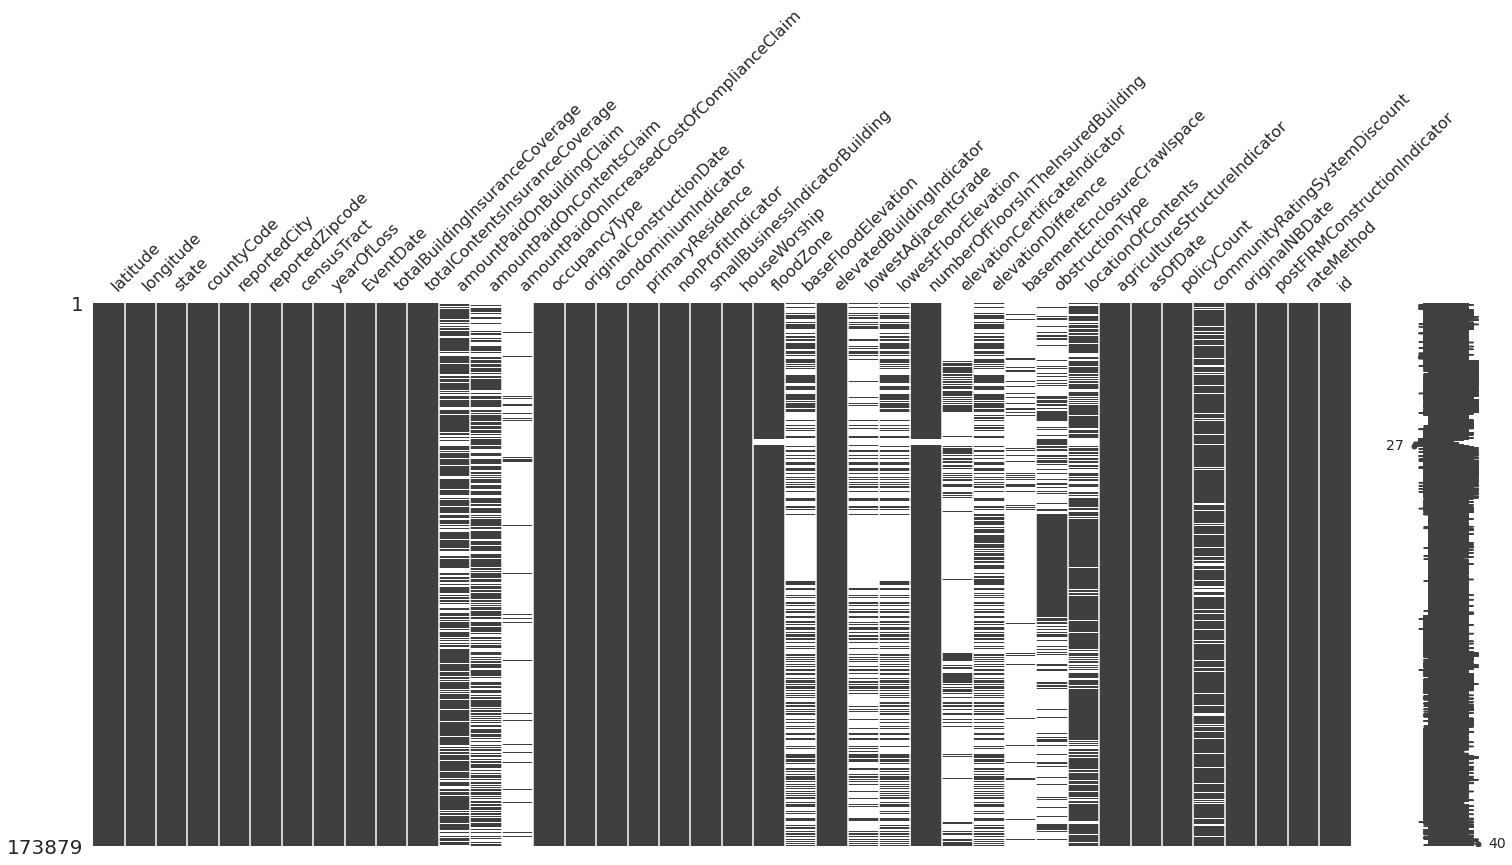

In [68]:
# Check missing values 
msno.matrix(df_Katrina)

# Explore attributes

More info at https://www.fema.gov/openfema-data-page/fima-nfip-redacted-claims

## Flood Zone

Flood zone derived from the Flood Insurance Rate Map (FIRM) used to rate the insured property.
- A - Special Flood with no Base Flood Elevation on FIRM;
- AE, A1-A30 - Special Flood with Base Flood Elevation on FIRM;
- A99 - Special Flood with Protection Zone;
- AH, AHB* - Special Flood with Shallow Ponding
- AO, AOB* - Special Flood with Sheet Flow;
- X, B - Moderate Flood from primary water source. Pockets of areas subject to drainage problems;
- X, C - Minimal Flood from primary water source. Pockets of areas subject to drainage problems;
- D - Possible Flood;
- V - Velocity Flood with no Base Flood Elevation on FIRM;
- VE, V1-V30 - Velocity Flood with Base Flood Elevation on FIRM;
- AE, VE, X - New zone designations used on new maps starting January 1, 1986, in lieu of A1-A30, V1-V30, and B and C;
- AR - A Special Flood Hazard Area that results from the decertification of a previously accredited flood protection system that is determined to be in the process of being restored to provide base flood protection;
- AR Dual Zones - (AR/AE, AR/A1-A30, AR/AH, AR/AO, AR/A) Areas subject to flooding from failure of the flood protection system (Zone AR) which also overlap an existing Special Flood Hazard Area as a dual zone;

*AHB, AOB, ARE, ARH, ARO, and ARA are not risk zones shown on a map, but are acceptable values for rating purposes

**Map**

[FEMA's National Flood Hazard Layer (NFHL) Viewer](https://www.arcgis.com/apps/webappviewer/index.html?id=8b0adb51996444d4879338b5529aa9cd)

https://www.fema.gov/flood-maps/national-flood-hazard-layer

In [69]:
# Check missing values
df_Katrina['floodZone'].isnull().value_counts()

False    172239
True       1640
Name: floodZone, dtype: int64

In [70]:
# Remove rows with missing information
df_Katrina.dropna(subset=['floodZone'], inplace=True)

In [71]:
# Check missing values
df_Katrina['floodZone'].isnull().value_counts()

False    172239
Name: floodZone, dtype: int64

In [72]:
# Flood zone
df_Katrina['floodZone'].value_counts(dropna=False)

AE     53013
X      18928
B      17433
A01    16600
A04    11925
A03     9384
A02     7799
C       5742
A10     5701
A07     3720
A08     3424
A09     2985
A05     2724
AOB     2259
A99     1727
AO      1665
A14     1340
VE      1216
A11      993
A        805
A06      326
A13      295
A12      286
V15      286
V13      244
A15      223
AHB      223
V09      192
V16      158
V14      104
V19       85
V12       85
V08       63
A16       60
V10       55
V11       54
AH        40
V21       30
A30        9
A25        8
V07        7
A26        7
V17        6
D          4
A17        2
A19        2
V          1
V20        1
Name: floodZone, dtype: int64

In [73]:
# Remove instances with no information on flood zone
df_Katrina = df_Katrina.dropna(axis=0, subset=['floodZone'])

[FEMA What does my flood zone mean?](https://www.floodsmart.gov/flood-map-zone/find-yours)

**High-risk flood areas**

High-risk flood areas begin with the letters A or V on FEMA flood maps.

These areas face the highest risk of flooding. If you own a property in a high-risk zone and have a federally backed mortgage, you are required to purchase flood insurance as a condition of that loan.

**Moderate- to low-risk flood areas**

Moderate- to low-risk flood areas are designated with the letters B, C, and X on FEMA flood maps.

In these areas, the risk of being flooded is reduced, but not completely removed. One in three insurance claims come from moderate- to low-risk flood areas.

Property owners in moderate- to low-risk areas are eligible for lower-cost flood insurance, known as Preferred Risk Policies (PRPs).

In [74]:
# Flood zone
df_Katrina['floodZone_grouped'] = df_Katrina['floodZone']

In [75]:
# Group by main Flood Areas
df_Katrina['floodZone_grouped'].replace('AE', 'A', inplace=True)
df_Katrina['floodZone_grouped'].replace('A01', 'A', inplace=True)
df_Katrina['floodZone_grouped'].replace('A04', 'A', inplace=True)
df_Katrina['floodZone_grouped'].replace('A03', 'A', inplace=True)
df_Katrina['floodZone_grouped'].replace('A02', 'A', inplace=True)
df_Katrina['floodZone_grouped'].replace('A10', 'A', inplace=True)
df_Katrina['floodZone_grouped'].replace('A07', 'A', inplace=True)
df_Katrina['floodZone_grouped'].replace('A08', 'A', inplace=True)
df_Katrina['floodZone_grouped'].replace('A09', 'A', inplace=True)
df_Katrina['floodZone_grouped'].replace('A05', 'A', inplace=True)
df_Katrina['floodZone_grouped'].replace('AOB', 'A', inplace=True)
df_Katrina['floodZone_grouped'].replace('A99', 'A', inplace=True)
df_Katrina['floodZone_grouped'].replace('AO', 'A', inplace=True)
df_Katrina['floodZone_grouped'].replace('A14', 'A', inplace=True)
df_Katrina['floodZone_grouped'].replace('A11', 'A', inplace=True)
df_Katrina['floodZone_grouped'].replace('A06', 'A', inplace=True)
df_Katrina['floodZone_grouped'].replace('A12', 'A', inplace=True)
df_Katrina['floodZone_grouped'].replace('A15', 'A', inplace=True)
df_Katrina['floodZone_grouped'].replace('A13', 'A', inplace=True)
df_Katrina['floodZone_grouped'].replace('AHB', 'A', inplace=True)
df_Katrina['floodZone_grouped'].replace('A16', 'A', inplace=True)
df_Katrina['floodZone_grouped'].replace('AH', 'A', inplace=True)
df_Katrina['floodZone_grouped'].replace('A30', 'A', inplace=True)
df_Katrina['floodZone_grouped'].replace('A26', 'A', inplace=True)
df_Katrina['floodZone_grouped'].replace('A25', 'A', inplace=True)
df_Katrina['floodZone_grouped'].replace('A19', 'A', inplace=True)
df_Katrina['floodZone_grouped'].replace('A19', 'A', inplace=True)
df_Katrina['floodZone_grouped'].replace('A18', 'A', inplace=True)

In [76]:
# Group by main Flood Areas
df_Katrina['floodZone_grouped'].replace('VE', 'V', inplace=True)
df_Katrina['floodZone_grouped'].replace('V15', 'V', inplace=True)
df_Katrina['floodZone_grouped'].replace('V13', 'V', inplace=True)
df_Katrina['floodZone_grouped'].replace('V09', 'V', inplace=True)
df_Katrina['floodZone_grouped'].replace('V16', 'V', inplace=True)
df_Katrina['floodZone_grouped'].replace('V14', 'V', inplace=True)
df_Katrina['floodZone_grouped'].replace('V19', 'V', inplace=True)
df_Katrina['floodZone_grouped'].replace('V12', 'V', inplace=True)
df_Katrina['floodZone_grouped'].replace('V08', 'V', inplace=True)
df_Katrina['floodZone_grouped'].replace('V10', 'V', inplace=True)
df_Katrina['floodZone_grouped'].replace('V11', 'V', inplace=True)
df_Katrina['floodZone_grouped'].replace('V21', 'V', inplace=True)
df_Katrina['floodZone_grouped'].replace('V17', 'V', inplace=True)
df_Katrina['floodZone_grouped'].replace('V07', 'V', inplace=True)

In [77]:
df_Katrina['floodZone_grouped'].value_counts(dropna=False)

A      127543
X       18928
B       17433
C        5742
V        2586
D           4
A17         2
V20         1
Name: floodZone_grouped, dtype: int64

## Amount Paid On Building Claim
Dollar amount paid on the building claim. In some instances, a negative amount may appear which occurs when a check issued to a policy holder isn't cashed and has to be re-issued.

In [78]:
# Building Claim
df_Katrina['amountPaidOnBuildingClaim']

1237             NaN
1247        96629.92
1414       117000.00
2270       105036.03
2295        11432.97
             ...    
2495650     91300.00
2495674     14500.00
2495814     50000.00
2495846          NaN
2495971     15381.76
Name: amountPaidOnBuildingClaim, Length: 172239, dtype: float64

In [79]:
# Building Claim
df_Katrina['amountPaidOnBuildingClaim'].isnull().value_counts(dropna=False)

False    130976
True      41263
Name: amountPaidOnBuildingClaim, dtype: int64

In [80]:
# Remove instances with missing information on Building Claim
df_Katrina = df_Katrina.dropna(axis=0, subset=['amountPaidOnBuildingClaim'])

In [81]:
df_Katrina['amountPaidOnBuildingClaim'].isnull().value_counts()

False    130976
Name: amountPaidOnBuildingClaim, dtype: int64

In [82]:
# Shape
nRow, nCol = df_Katrina.shape
nRow = '{:,.0f}'.format(nRow)
print(f'There are {nRow} rows and {nCol} columns')

There are 130,976 rows and 41 columns


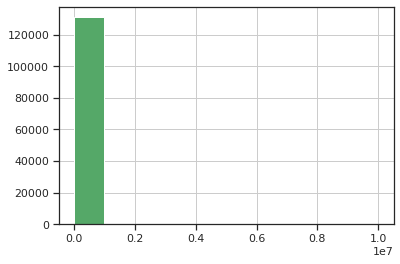

In [83]:
# Visualise distribution of Building Claims
df_Katrina['amountPaidOnBuildingClaim'].hist(facecolor='g')

In [84]:
# See range of Building Claims
df_Katrina['amountPaidOnBuildingClaim'].describe().round(2)

count      130976.00
mean        86942.12
std         81010.05
min             0.00
25%         42906.19
50%         74800.00
75%        111300.00
max      10000000.00
Name: amountPaidOnBuildingClaim, dtype: float64

In [85]:
# How many instances with Building Claim = 0 
len(df_Katrina[df_Katrina['amountPaidOnBuildingClaim'] == 0])

153

In [86]:
# How many instances have Building Claim different from 0 
len(df_Katrina[df_Katrina['amountPaidOnBuildingClaim'] != 0])

130823

In [87]:
# Select instance with Building Claim different from 0 
df_Katrina = df_Katrina[df_Katrina['amountPaidOnBuildingClaim'] != 0]

In [88]:
# See range of Building Claims
df_Katrina['amountPaidOnBuildingClaim'].describe().round(2)

count      130823.00
mean        87043.80
std         81002.79
min             2.71
25%         43021.02
50%         74873.76
75%        111400.00
max      10000000.00
Name: amountPaidOnBuildingClaim, dtype: float64

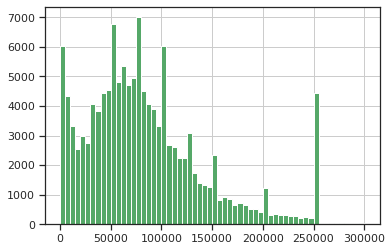

In [89]:
# Visualise distribution of Building Claims up to US$300,000
df_Katrina['amountPaidOnBuildingClaim'].hist(bins=[0, 5000, 10000, 15000, 20000, 25000, 30000, 35000, 40000, 45000, 50000, 55000, 60000, 65000, 70000, 75000, 80000, 85000, 90000, 95000, 100000, 105000, 110000, 115000, 120000, 125000, 130000, 135000, 140000, 145000, 150000, 155000, 160000, 165000, 170000, 175000, 180000, 185000, 190000, 195000, 200000, 205000, 210000, 215000, 220000, 225000, 230000, 235000, 240000, 245000, 250000, 255000, 260000, 265000, 270000, 275000, 280000, 285000, 290000, 295000, 300000], facecolor='g')

It seems that:
- some instances are aggregated at USD50,000, USD100,000, USD125,000, ...

In [90]:
# How many instances with Building Claim = US$250,000 
len(df_Katrina[df_Katrina['amountPaidOnBuildingClaim'] == 250000])

4412

In [91]:
per_instances_at_250000 = len(df_Katrina[df_Katrina['amountPaidOnBuildingClaim'] == 250000])/len(df_Katrina)*100
per_instances_at_250000 = '{:,.2f}'.format(per_instances_at_250000)
print(f'There is {per_instances_at_250000}% of instances at US$250,000')

There is 3.37% of instances at US$250,000


## Total Building Insurance Coverage

Total Insurance Amount in dollars on the Building

In [92]:
# Building insurance coverage
df_Katrina['totalBuildingInsuranceCoverage'].value_counts(dropna=False)

250000.0     12933
100000.0      5414
75000.0       4051
150000.0      3225
50000.0       3098
             ...  
1200000.0        1
620700.0         1
696500.0         1
278400.0         1
232600.0         1
Name: totalBuildingInsuranceCoverage, Length: 3099, dtype: int64

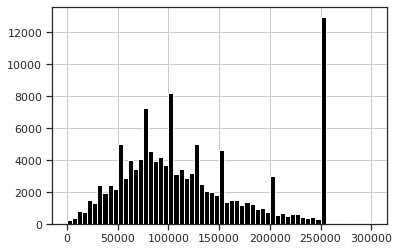

In [93]:
# Visualise distribution of insurance coverage up to US$300,000
df_Katrina['totalBuildingInsuranceCoverage'].hist(bins=[0, 5000, 10000, 15000, 20000, 25000, 30000, 35000, 40000, 45000, 50000, 55000, 60000, 65000, 70000, 75000, 80000, 85000, 90000, 95000, 100000, 105000, 110000, 115000, 120000, 125000, 130000, 135000, 140000, 145000, 150000, 155000, 160000, 165000, 170000, 175000, 180000, 185000, 190000, 195000, 200000, 205000, 210000, 215000, 220000, 225000, 230000, 235000, 240000, 245000, 250000, 255000, 260000, 265000, 270000, 275000, 280000, 285000, 290000, 295000, 300000], facecolor='black')

## Amount Paid On Increased Cost Of Compliance Claim

Dollar amount paid on the Increased Cost of Compliance (ICC) claim. Increased Cost of Compliance (ICC) coverage is one of several flood insurances resources for policyholders who need additional help rebuilding after a flood. It provides up to $30,000 to help cover the cost of mitigation measures that will reduce the flood risk

In [94]:
df_Katrina['amountPaidOnIncreasedCostOfComplianceClaim'].value_counts(dropna=False)

NaN         120079
30000.00      4449
15000.00       258
6300.00         35
8500.00         33
             ...  
11304.00         1
22791.16         1
15456.00         1
15547.17         1
9196.00          1
Name: amountPaidOnIncreasedCostOfComplianceClaim, Length: 3800, dtype: int64

In [95]:
df_Katrina['amountPaidOnIncreasedCostOfComplianceClaim'].describe().round(2)

count    10744.00
mean     20052.21
std       9922.88
min          0.00
25%      10299.00
50%      20899.00
75%      30000.00
max      45000.00
Name: amountPaidOnIncreasedCostOfComplianceClaim, dtype: float64

## Building claim and building insurance

In [96]:
# Amount paid and insurance coverage
df_Katrina[['amountPaidOnBuildingClaim', 'totalBuildingInsuranceCoverage']]

,amountPaidOnBuildingClaim,totalBuildingInsuranceCoverage
1247,96629.92,163400.0
1414,117000.00,117000.0
2270,105036.03,250000.0
2295,11432.97,100000.0
4471,440000.00,440000.0
...,...,...
2495450,40000.00,40000.0
2495650,91300.00,91300.0
2495674,14500.00,14600.0
2495814,50000.00,50000.0


In [97]:
# Define a function that compares amountPaidOnBuildingClaim and totalBuildingInsuranceCoverage
def money_paid (row):
    if row['amountPaidOnBuildingClaim'] == row['totalBuildingInsuranceCoverage']:
        return 'True'
    return 'False'

In [98]:
# Create column Overcap
df_Katrina['PaidEqualsInsuranceCoverage'] = df_Katrina.apply (lambda row: money_paid(row), axis=1)

In [99]:
# Amount paid and insurance coverage
df_Katrina[['amountPaidOnBuildingClaim', 'totalBuildingInsuranceCoverage', 'PaidEqualsInsuranceCoverage']]

,amountPaidOnBuildingClaim,totalBuildingInsuranceCoverage,PaidEqualsInsuranceCoverage
1247,96629.92,163400.0,False
1414,117000.00,117000.0,True
2270,105036.03,250000.0,False
2295,11432.97,100000.0,False
4471,440000.00,440000.0,True
...,...,...,...
2495450,40000.00,40000.0,True
2495650,91300.00,91300.0,True
2495674,14500.00,14600.0,False
2495814,50000.00,50000.0,True


In [100]:
df_Katrina['PaidEqualsInsuranceCoverage'].value_counts(dropna=False)

True     72750
False    58073
Name: PaidEqualsInsuranceCoverage, dtype: int64

So some buildings suffered less damages than the cap of the insurance coverage?

Or did some buildings have multiple claims that led to the total building insurance coverage?
If this is the case, is there a way to identify each building?

In [101]:
# How many instances with Building Claim > $250,000
len(df_Katrina[df_Katrina['amountPaidOnBuildingClaim'] > 250000])

1364

In [102]:
df_Katrina_above_insurance = df_Katrina[df_Katrina['amountPaidOnBuildingClaim'] > 250000]

In [103]:
df_Katrina_above_insurance[['amountPaidOnBuildingClaim', 'totalBuildingInsuranceCoverage', 'PaidEqualsInsuranceCoverage']]

,amountPaidOnBuildingClaim,totalBuildingInsuranceCoverage,PaidEqualsInsuranceCoverage
4471,440000.00,440000.0,True
27886,500000.00,500000.0,True
33460,440000.00,440000.0,True
47024,399257.29,500000.0,False
47305,324050.54,500000.0,False
...,...,...,...
2422461,500000.00,500000.0,True
2423045,500000.00,500000.0,True
2423964,500000.00,500000.0,True
2424983,273000.00,273000.0,True


In [104]:
df_Katrina_above_insurance['PaidEqualsInsuranceCoverage'].value_counts(dropna=False)

True     983
False    381
Name: PaidEqualsInsuranceCoverage, dtype: int64

## Non Profit Indicator

Yes (Y) or No (N) indicator of whether or not a building is reported as being a non-profit in the policy application.
- Yes is indicated with either a 'true' or '1'.
- No is indicated with either a 'false' or '0'

In [105]:
df_Katrina['nonProfitIndicator'].value_counts(dropna=False)

0.0    130811
1.0        12
Name: nonProfitIndicator, dtype: int64

In [106]:
# Explore profit buildings
df_Katrina[df_Katrina['nonProfitIndicator'] == 1]

,latitude,longitude,state,countyCode,reportedCity,reportedZipcode,censusTract,yearOfLoss,EventDate,totalBuildingInsuranceCoverage,totalContentsInsuranceCoverage,amountPaidOnBuildingClaim,amountPaidOnContentsClaim,amountPaidOnIncreasedCostOfComplianceClaim,occupancyType,originalConstructionDate,condominiumIndicator,primaryResidence,nonProfitIndicator,smallBusinessIndicatorBuilding,houseWorship,floodZone,baseFloodElevation,elevatedBuildingIndicator,lowestAdjacentGrade,lowestFloorElevation,numberOfFloorsInTheInsuredBuilding,elevationCertificateIndicator,elevationDifference,basementEnclosureCrawlspace,obstructionType,locationOfContents,agricultureStructureIndicator,asOfDate,policyCount,communityRatingSystemDiscount,originalNBDate,postFIRMConstructionIndicator,rateMethod,id,floodZone_grouped,PaidEqualsInsuranceCoverage
147663,30.0,-90.1,LA,22071.0,NEW ORLEANS,70112.0,22071013400,2005,2005-08-29,500000.0,500000.0,90303.16,NaN,NaN,4.0,1970-08-02T04:00:00.000Z,N,0.0,1.0,0.0,0.0,A01,NaN,0.0,NaN,NaN,3.0,NaN,NaN,NaN,NaN,5.0,0.0,2020-11-01T23:58:45.858Z,1.0,8.0,1998-07-27T04:00:00.000Z,0.0,1,5faad480ad3f680818791106,A,False
147697,30.0,-90.1,LA,22071.0,NEW ORLEANS,70112.0,22071013400,2005,2005-08-29,500000.0,500000.0,500000.00,500000.00,NaN,4.0,1975-01-01T05:00:00.000Z,N,0.0,1.0,0.0,0.0,A01,100.0,0.0,0.0,100.0,2.0,NaN,0.0,NaN,NaN,4.0,0.0,2020-11-01T23:58:45.858Z,1.0,8.0,1998-07-27T04:00:00.000Z,1.0,1,5faad480ad3f680818791109,A,True
147698,30.0,-90.1,LA,22071.0,NEW ORLEANS,70112.0,22071013400,2005,2005-08-29,500000.0,500000.0,500000.00,500000.00,NaN,4.0,1970-08-02T04:00:00.000Z,N,0.0,1.0,0.0,0.0,X,NaN,0.0,NaN,NaN,3.0,NaN,NaN,1.0,NaN,2.0,0.0,2020-11-01T23:58:45.858Z,1.0,8.0,1998-07-27T04:00:00.000Z,0.0,1,5faad480ad3f68081879110d,X,True
150348,30.0,-90.1,LA,22071.0,NEW ORLEANS,70112.0,22071013400,2005,2005-08-29,500000.0,500000.0,500000.00,NaN,NaN,4.0,2040-01-01T05:00:00.000Z,N,0.0,1.0,0.0,0.0,AE,NaN,0.0,NaN,NaN,3.0,NaN,NaN,2.0,NaN,4.0,0.0,2020-11-01T23:58:45.858Z,1.0,8.0,1998-09-07T04:00:00.000Z,0.0,1,5faad480ad3f680818791b7e,A,True
183843,29.9,-90.1,LA,22071.0,NEW ORLEANS,70118.0,22071012101,2005,2005-08-29,400000.0,100000.0,400000.00,NaN,NaN,4.0,2041-01-01T05:00:00.000Z,N,0.0,1.0,0.0,0.0,A01,1.0,0.0,-0.8,2.0,3.0,NaN,1.0,NaN,NaN,4.0,0.0,2020-11-01T23:58:45.858Z,1.0,8.0,2001-09-16T04:00:00.000Z,0.0,1,5faad485ad3f680818799e8a,A,True
183887,29.9,-90.1,LA,22071.0,NEW ORLEANS,70118.0,22071012102,2005,2005-08-29,250000.0,150000.0,62308.22,NaN,NaN,4.0,2040-01-01T05:00:00.000Z,N,0.0,1.0,0.0,0.0,X,1.0,0.0,NaN,0.0,2.0,NaN,-1.0,NaN,NaN,4.0,0.0,2020-11-01T23:58:45.858Z,1.0,8.0,2001-09-16T04:00:00.000Z,0.0,1,5faad485ad3f680818799eb1,X,False
488765,30.0,-90.0,LA,22071.0,NEW ORLEANS,70127.0,22071001748,2005,2005-08-29,48400.0,38600.0,48400.00,38600.00,NaN,1.0,2002-01-01T05:00:00.000Z,N,1.0,1.0,0.0,0.0,A04,-4.0,0.0,0.0,-3.0,1.0,NaN,0.0,NaN,NaN,3.0,0.0,2020-11-01T23:58:45.858Z,1.0,8.0,2004-11-13T05:00:00.000Z,0.0,1,5faad4b0ad3f6808187e456b,A,True
489588,30.3,-89.8,LA,22103.0,SLIDELL,70458.0,22103040900,2005,2005-08-29,355400.0,57900.0,355400.00,57900.00,NaN,4.0,1960-01-01T05:00:00.000Z,N,0.0,1.0,0.0,0.0,A04,NaN,0.0,NaN,NaN,1.0,NaN,NaN,0.0,NaN,3.0,0.0,2020-11-01T23:58:45.858Z,1.0,9.0,2004-12-08T05:00:00.000Z,0.0,1,5faad4b0ad3f6808187e48df,A,True
899163,30.3,-89.8,LA,22103.0,SLIDELL,70460.0,22103041101,2005,2005-08-29,125000.0,50000.0,71642.34,31000.94,NaN,1.0,1984-03-01T05:00:00.000Z,N,0.0,1.0,0.0,0.0,B,NaN,0.0,NaN,NaN,1.0,1.0,NaN,NaN,NaN,3.0,0.0,2020-11-01T23:58:45.858Z,1.0,7.0,2004-03-28T05:00:00.000Z,1.0,7,5faad4f3ad3f6808188488dc,B,False
2061529,30.4,-88.9,MS,28047.0,BILOXI,39530.0,28047003900,2005,2005-08-29,450000.0,100000.0,233704.74,81357.80,NaN,4.0,2003-12-29T05:00:00.000Z,N,0.0,1.0,0.0,0.0,A09,11.0,0.0,13.7,15.0,1.0,NaN,4.0,NaN,NaN,3.0,0.0,2020-11-01T23:58:45.858Z,1.0,5.0,2005-06-21T04:00:00.000Z,1.0,1,5faad5dbad3f68081896440c,A,False


## Small Business Indicator Building

Yes (Y) or No (N) indicator of whether or not the insured represents a small business.
 - Yes is indicated with either a 'true' or '1'.
 - No is indicated with either a 'false' or '0'. 

Small business is defined as a business with fewer than 100 employees in the policy application

In [107]:
# Small Business Indicator Building
df_Katrina['smallBusinessIndicatorBuilding'].value_counts(dropna=False)

0.0    130769
1.0        54
Name: smallBusinessIndicatorBuilding, dtype: int64

In [108]:
# Explore profit buildings
df_Katrina[df_Katrina['smallBusinessIndicatorBuilding'] == 1]

,latitude,longitude,state,countyCode,reportedCity,reportedZipcode,censusTract,yearOfLoss,EventDate,totalBuildingInsuranceCoverage,totalContentsInsuranceCoverage,amountPaidOnBuildingClaim,amountPaidOnContentsClaim,amountPaidOnIncreasedCostOfComplianceClaim,occupancyType,originalConstructionDate,condominiumIndicator,primaryResidence,nonProfitIndicator,smallBusinessIndicatorBuilding,houseWorship,floodZone,baseFloodElevation,elevatedBuildingIndicator,lowestAdjacentGrade,lowestFloorElevation,numberOfFloorsInTheInsuredBuilding,elevationCertificateIndicator,elevationDifference,basementEnclosureCrawlspace,obstructionType,locationOfContents,agricultureStructureIndicator,asOfDate,policyCount,communityRatingSystemDiscount,originalNBDate,postFIRMConstructionIndicator,rateMethod,id,floodZone_grouped,PaidEqualsInsuranceCoverage
27886,30.3,-89.2,MS,28047.0,PASS CHRISTIAN,39571.0,28047002900,2005,2005-08-29,500000.0,275600.0,500000.00,275600.00,NaN,6.0,1999-11-29T05:00:00.000Z,N,0.0,0.0,1.0,0.0,AHB,10.0,0.0,9.5,13.0,1.0,NaN,3.0,0.0,NaN,3.0,0.0,2020-11-01T23:58:45.858Z,1.0,8.0,2002-05-17T04:00:00.000Z,1.0,1,5faad46fad3f680818773d2b,A,True
30641,30.4,-88.3,AL,1097.0,BAYOU LA BATRE,36509.0,1097007300,2005,2005-08-29,60000.0,0.0,60000.00,NaN,NaN,6.0,1950-01-01T05:00:00.000Z,N,0.0,0.0,1.0,0.0,AE,NaN,0.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,0.0,2020-11-01T23:58:45.858Z,1.0,NaN,2000-06-15T04:00:00.000Z,0.0,1,5faad470ad3f6808187747f8,A,True
48055,30.0,-89.9,LA,22071.0,NEW ORLEANS,70129.0,22071001751,2005,2005-08-29,500000.0,500000.0,171242.20,20270.88,NaN,6.0,1980-08-03T04:00:00.000Z,N,0.0,0.0,1.0,0.0,A01,2.0,0.0,0.0,2.0,1.0,NaN,1.0,NaN,NaN,3.0,0.0,2020-11-01T23:58:45.858Z,1.0,8.0,2001-01-09T05:00:00.000Z,1.0,1,5faad472ad3f680818778ca2,A,False
48278,30.0,-90.1,LA,22071.0,NEW ORLEANS,70118.0,22071007604,2005,2005-08-29,50000.0,10000.0,50000.00,10000.00,NaN,6.0,1996-02-01T05:00:00.000Z,N,0.0,0.0,1.0,0.0,A03,0.0,0.0,0.4,1.0,1.0,NaN,1.0,NaN,NaN,3.0,0.0,2020-11-01T23:58:45.858Z,1.0,8.0,1999-11-25T05:00:00.000Z,1.0,1,5faad472ad3f680818778b68,A,True
123696,30.3,-89.8,LA,22103.0,SLIDELL,70458.0,22103040900,2005,2005-08-29,500000.0,285000.0,500000.00,285000.00,NaN,6.0,1995-01-01T05:00:00.000Z,N,0.0,0.0,1.0,0.0,AE,9.0,0.0,NaN,10.0,2.0,NaN,1.0,NaN,NaN,3.0,0.0,2020-11-01T23:58:45.858Z,1.0,9.0,1997-01-21T05:00:00.000Z,1.0,1,5faad47dad3f68081878af89,A,True
151149,30.5,-88.5,MS,28059.0,MOSS POINT,39563.0,28059041300,2005,2005-08-29,500000.0,243100.0,487285.70,130868.98,NaN,6.0,1984-07-01T04:00:00.000Z,N,0.0,0.0,1.0,0.0,X,NaN,0.0,NaN,NaN,2.0,NaN,NaN,0.0,NaN,4.0,0.0,2020-11-01T23:58:45.858Z,1.0,NaN,2003-09-07T04:00:00.000Z,1.0,1,5faad481ad3f680818791e9b,X,False
162412,30.4,-88.6,MS,28059.0,GAUTIER,39553.0,28059041000,2005,2005-08-29,73300.0,30500.0,73300.00,30500.00,NaN,6.0,1974-01-01T05:00:00.000Z,N,0.0,0.0,1.0,0.0,AE,NaN,1.0,NaN,NaN,2.0,NaN,NaN,NaN,54.0,3.0,0.0,2020-11-01T23:58:45.858Z,1.0,8.0,2003-10-18T04:00:00.000Z,0.0,1,5faad482ad3f680818794b5e,A,True
163682,30.5,-88.5,MS,28059.0,MOSS POINT,39563.0,28059041300,2005,2005-08-29,500000.0,182400.0,269068.63,49258.46,NaN,6.0,1984-07-01T04:00:00.000Z,N,0.0,0.0,1.0,0.0,B,NaN,0.0,NaN,NaN,2.0,NaN,NaN,NaN,NaN,4.0,0.0,2020-11-01T23:58:45.858Z,1.0,8.0,2003-09-07T04:00:00.000Z,1.0,1,5faad482ad3f6808187951fa,B,False
184256,29.9,-90.1,LA,22071.0,NEW ORLEANS,70118.0,22071012102,2005,2005-08-29,250000.0,100000.0,51534.68,NaN,NaN,6.0,1959-01-01T05:00:00.000Z,N,0.0,0.0,1.0,0.0,A01,1.0,1.0,0.2,2.0,2.0,NaN,1.0,NaN,10.0,4.0,0.0,2020-11-01T23:58:45.858Z,1.0,8.0,2001-09-21T04:00:00.000Z,0.0,1,5faad485ad3f68081879a007,A,False
220582,30.5,-88.9,MS,28047.0,BILOXI,39532.0,28047003402,2005,2005-08-29,112500.0,0.0,96499.00,NaN,NaN,6.0,2000-01-01T05:00:00.000Z,N,0.0,0.0,1.0,0.0,A09,11.0,0.0,11.2,13.0,1.0,NaN,3.0,NaN,NaN,NaN,0.0,2020-11-01T23:58:45.858Z,1.0,5.0,2003-12-27T05:00:00.000Z,1.0,1,5faad48aad3f6808187a2e05,A,False


## Policy Count

Insured units in an active status. A policy contract ceases to be in an active status as of the cancellation date or the expiration date. Residential Condominium Building Association Policy (RCBAP) contracts are stored as a single policy contract but insure multiple units and therefore represent multiple policies

In [109]:
df_Katrina['policyCount'].value_counts(dropna=False)

1.0      130000
4.0         178
2.0         140
6.0         134
5.0          47
          ...  
103.0         1
145.0         1
77.0          1
52.0          1
39.0          1
Name: policyCount, Length: 63, dtype: int64

## Community Rating System Discount
The Community Rating System (CRS) Classification Credit Percentage used to rate the policy.

The insurance premium credit is based on whether a property is in or out of the Special Flood Hazard Area (SFHA) as shown on the community's Flood Insurance Rate Map. The premium credit for properties in the SFHA increases according to a community's CRS class:
- 1 - SFHA 45% ** Non SFHA 10% **;
- 2 - SFHA 40% ** Non SFHA 10% **;
- 3 - SFHA 35% ** Non SFHA 10% **;
- 4 - SFHA 30% ** Non SFHA 10% **;
- 5 - SFHA 25% ** Non SFHA 10% **;
- 6 - SFHA 20% ** Non SFHA 10% **;
- 7 - SFHA 15% ** Non SFHA 5% **;
- 8 - SFHA 10% ** Non SFHA 5% **;
- 9 - SFHA 5% Non SFHA 5%;
- 10 - SFHA 0% Non SFHA 0%;

*For the purpose of determining CRS Premium Discounts, all AR and A99 zones are treated as non-SFHAs.

**These percentages are subject to change. Always refer to the Flood Insurance Manual for the latest information

In [110]:
df_Katrina['communityRatingSystemDiscount'].value_counts(dropna=False)

8.0     60105
5.0     25002
NaN     20881
7.0     17413
9.0      3422
6.0      3342
10.0      658
Name: communityRatingSystemDiscount, dtype: int64

## Agriculture Structure Indicator

Yes (Y) or No (N) indicator of whether or not a building is reported as being an agricultural structure in the policy 

In [111]:
# agricultureStructureIndicator
df_Katrina['agricultureStructureIndicator'].value_counts(dropna=False)

0.0    130823
Name: agricultureStructureIndicator, dtype: int64

## As Of Date

The effective date of the data in the file. When time is not specified in the field, it will default to T00:00:00.000Z

In [112]:
# asOfDate
df_Katrina['asOfDate'].value_counts(dropna=False)

2020-11-01T23:58:45.858Z    130725
2020-10-27T17:56:33.967Z        98
Name: asOfDate, dtype: int64

## Base Flood Elevation
Base Flood Elevation (BFE) is the elevation at which there is a 1% chance per year of flooding in feet from the elevation certificate

In [113]:
# See missing values
df_Katrina['baseFloodElevation'].isnull().value_counts(dropna=False)

True     73724
False    57099
Name: baseFloodElevation, dtype: int64

In [114]:
# Base flood elevation (in feet)
df_Katrina['baseFloodElevation'].value_counts(dropna=False)

 NaN      73724
-3.0      10257
 1.0       8568
-4.0       6207
-1.0       4412
          ...  
 150.0        1
 41.0         1
-12.0         1
 40.0         1
 159.0        1
Name: baseFloodElevation, Length: 83, dtype: int64

In [115]:
# Base flood elevation (in feet)
df_Katrina['baseFloodElevation'].describe().round(2)

count    57099.00
mean         3.38
std         48.48
min       -999.00
25%         -3.00
50%          0.00
75%          9.00
max       9990.00
Name: baseFloodElevation, dtype: float64

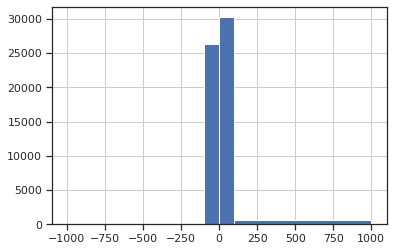

In [116]:
# Visualise distribution of baseFloodElevation
df_Katrina['baseFloodElevation'].hist(bins=[-1000, -100, 0, 100, 1000],facecolor='b')

## Basement Enclosure Crawlspace Type
Basement is defined for purposes of the NFIP as any level or story which has its floor subgrade on all sides.

Basement structure values are as follows:
- 0 - none;
- 1 - Finished Basement/Enclosure;
- 2 - Unfinished Basement/Enclosure;
- 3 - Crawlspace;
- 4 - Subgrade Crawlspace

In [117]:
df_Katrina['basementEnclosureCrawlspace'].value_counts(dropna=False)

NaN    120257
0.0      6808
2.0      2612
1.0      1008
4.0       138
Name: basementEnclosureCrawlspace, dtype: int64

## Condominium Indicator 
This is an indicator of what type of condominium property is being insured. 

Condominium Code - 1 character:
- Not a condominium (N);
- An individual condominium unit owned by a unit owner, or by a condominium association (U);
- The entire condominium building owned by the association insuring building common elements as well as building elements (additions and alterations) within all units in the building, not eligible under Condominium Master Policy (A);
- The entire residential condominium building owned by the association eligible under Condominium Master Policy, insuring the entire condominium building common elements as well as building elements (additions and alterations) within all units in the building, (H) for High-Rise or (L) for Low-Rise; Townhouses (T);

In [118]:
# condominiumIndicator
df_Katrina['condominiumIndicator'].value_counts(dropna=False)

N      129554
L         640
U         418
H         196
A          12
NaN         3
Name: condominiumIndicator, dtype: int64

## Elevated Building Indicator

 Yes (Y) or No (N) indicator of whether or not a building meets the NFIP definition of an elevated building. 
 
 - Yes is indicated with either a 'true' or '1'.
 - No is indicated with either a 'false' or '0'. 
 
An elevated building is a no-basement building that was constructed so as to meet the following criteria:
1. The top of the elevated floor (all A zones) or the bottom of the lowest horizontal structural member of the lowest floor (all V zones) is above ground level. 
2. The building is adequately anchored.
3. The method of elevation is pilings, columns (posts and piers), shear walls (not in V zones), or solid foundation perimeter walls (not in V zones)

In [119]:
# See missing values
df_Katrina['elevatedBuildingIndicator'].isnull().value_counts(dropna=False)

False    130823
Name: elevatedBuildingIndicator, dtype: int64

In [120]:
# Elevated building indicator
df_Katrina['elevatedBuildingIndicator'].value_counts(dropna=False)

0.0    105151
1.0     25672
Name: elevatedBuildingIndicator, dtype: int64

## Elevation Difference

Difference in feet between the elevation of the lowest floor used for rating or the floodproofed elevation and the base flood elevation (BFE), or base flood depth, as appropriate from the elevation certificate.

In [121]:
# See missing values
df_Katrina['elevationDifference'].isnull().value_counts(dropna=False)

False    66516
True     64307
Name: elevationDifference, dtype: int64

In [122]:
# Elevation Difference
df_Katrina['elevationDifference'].value_counts(dropna=False)

NaN      64307
0.0      23768
1.0      18428
2.0      10060
3.0       4525
         ...  
40.0         1
143.0        1
30.0         1
93.0         1
39.0         1
Name: elevationDifference, Length: 73, dtype: int64

## Elevation Certificate Indicator

Indicates if a policy has been rated with elevation certificate.
- 1 - No Elevation Certificate, original effective date prior to October 1, 1982, with no break in insurance coverage or change in insurable interest. Policies will be rated using 'No Base Flood Elevation' +2 to +4 feet rates;
- 2 - No Elevation Certificate, original effective date on or after October 1, 1982, with no break in insurance coverage or change in insurable interest. Policies will be rated using 'No Elevation Certificate' rates;
- 3 - Elevation Certificate with BFE. Policies will be rated using 'With Base Flood Elevation' rates;
- 4 - Elevation Certificate without BFE. Policies will be rated using 'No Base Flood Elevation' rates;

In [123]:
# Elevated building indicator
df_Katrina['elevationCertificateIndicator'].value_counts(dropna=False)

NaN    101860
3.0     17774
1.0     10107
2.0       624
4.0       458
Name: elevationCertificateIndicator, dtype: int64

## House Of Worship

Yes (Y) or No (N) indicator of whether or not a building is reported as being a house of worship in the policy application.
- Yes is indicated with either a 'true' or '1'.
- No is indicated with either a 'false' or '0'

In [124]:
# House of worship
df_Katrina['houseWorship'].value_counts(dropna=False)

0.0    130808
1.0        15
Name: houseWorship, dtype: int64

## Location Of Contents

Code that indicates where within the structure the contents are located.
- 1 - Basement/Enclosure/Crawlspace/Subgrade Crawlspace only;
- 2 - Basement/Enclosure/Crawlspace/Subgrade Crawlspace and above;
- 3 - Lowest floor only above ground level (No basement/enclosure/crawlspace/subgrade crawlspace);
- 4 - Lowest floor above ground level and higher floors (No basement/enclosure/crawlspace/subgrade crawlspace);
- 5 - Above ground level more than one full floor;
- 6 - Manufactured (mobile) home or travel trailer on foundation;

In [125]:
# Location Of Contents
df_Katrina['locationOfContents'].value_counts(dropna=False)

3.0    71386
NaN    34526
4.0    21775
2.0     2243
6.0      527
7.0      221
5.0      144
1.0        1
Name: locationOfContents, dtype: int64

## Amount Paid On Contents Claim
Dollar amount paid on the contents claim. In some instances, a negative amount may appear, which occurs when a check issued to a policy holder isn't cashed and has to be re-issued

In [126]:
# Amount Paid On Contents Claim
df_Katrina['amountPaidOnContentsClaim'].value_counts(dropna=False)

NaN         35843
20000.00     4996
10000.00     4871
30000.00     4580
40000.00     3255
            ...  
86502.17        1
3727.31         1
20288.20        1
228.98          1
33050.98        1
Name: amountPaidOnContentsClaim, Length: 21585, dtype: int64

## Total Contents Insurance Coverage

Total Insurance Amount in dollars on the Contents

In [127]:
# Total Contents Insurance Coverage
df_Katrina['totalContentsInsuranceCoverage'].value_counts(dropna=False)

0.0         27974
100000.0     8061
20000.0      6138
30000.0      6079
50000.0      5697
            ...  
213200.0        1
89100.0         1
105500.0        1
130500.0        1
209000.0        1
Name: totalContentsInsuranceCoverage, Length: 1251, dtype: int64

## Lowest Adjacent Grade
Lowest natural grade adjacent to the insured structure prior to excavating or filling. The difference in feet of the lowest natural grade adjacent to the building from the reference level of the building

In [128]:
# Lowest Adjacent Grade
df_Katrina['lowestAdjacentGrade'].value_counts(dropna=False)

 NaN       91312
 0.0        3602
-4.6         578
-4.5         578
-4.7         541
           ...  
-14.1          1
-62.6          1
 1369.0        1
 180.0         1
-11.2          1
Name: lowestAdjacentGrade, Length: 455, dtype: int64

## Lowest Floor Elevation

A building's lowest floor is the floor or level (including basement/enclosure/crawlspace/subgrade crawlspace) that is used as the point of reference when rating a building. This includes the level to which a building is floodproofed*. The elevation in feet of the reference level of the building from the elevation certificate

In [129]:
# Lowest Floor Elevation
df_Katrina['lowestFloorElevation'].value_counts(dropna=False)

 NaN      73686
-3.0       9689
 0.0       5945
-2.0       5658
 1.0       4913
          ...  
 35.0         1
-42.0         1
-10.0         1
-30.0         1
-383.0        1
Name: lowestFloorElevation, Length: 103, dtype: int64

## Number Of Floors In The Insured Building

Code that indicates the number of floors in the insured building.
- 1 = One floor;
- 2 = Two floors;
- 3 = Three or more floors;
- 4 = Split-level;
- 5 = Manufactured (mobile) home or travel trailer on foundation;
- 6 = Townhouse/Rowhouse with three or more floors (RCBAP Low-rise only);

In [130]:
# Number of Floors
df_Katrina['numberOfFloorsInTheInsuredBuilding'].value_counts(dropna=False)

1.0    93797
2.0    31438
3.0     4238
4.0      757
5.0      581
6.0       12
Name: numberOfFloorsInTheInsuredBuilding, dtype: int64

## Obstruction Type

Code that gives the type of obstruction (if any) in the enclosure (if any).

- With obstruction: enclosure/crawlspace with proper openings not used for rating (not applicable in V zones) - **15**;
- With obstruction: less than 300 sq. ft. with breakaway walls, but no machinery or equipment attached to building below lowest elevated floor, or elevation of machinery/equipment is at or above Base Flood Elevation - **20**;
- With obstruction: less than 300 sq. ft. with breakaway walls or finished enclosure and with machinery or equipment attached to building below lowest elevated floor, and elevation of machinery/equipment is below Base Flood Elevation - **24**;
- With obstruction: 300 sq. ft. or more with breakaway walls, but no machinery or equipment attached to building below the Base Flood Elevation - **30**;
- With obstruction: 300 sq. ft. or more with breakaway walls or finished enclosure and with machinery or equipment attached to building below the Base Flood Elevation - **34**;
- With obstruction: no walls, but the elevation of machinery or equipment attached to building is below Base Flood Elevation (NOTE: Use Obstruction Type '10' and Without Obstruction Rate Table if the elevation of machinery/equipment is at or above Base Flood Elevation.) - **40**;
- With obstruction: nonbreakaway walls/crawlspace or finished enclosure with no machinery or equipment attached to building below lowest elevated floor - **50**;
- With obstruction: nonbreakaway walls/crawlspace or finished enclosure with machinery or equipment attached to building below lowest elevated floor - **54**;
- With obstruction - **60**;
- With Certification subgrade crawlspace (AE, A01-A30, unnumbered A, AO, AH, AOB, AHB zones) - **70**;
- Without Certification subgrade crawlspace (all zones) - **80**;
- With Enclosure: Elevated buildings with elevator below the BFE in A zones. No other enclosure below the BFE. - **90**;
- Free of Obstruction: Elevated buildings with lattice, slats, or shutters (including louvers) enclosing the elevator below the BFE in V zones. No other obstruction or machinery and equipment (M&E) servicing the building located below the BFE. The building will be rated free of obstruction with the V zone elevator loading added to the building basic limit. - **91**;
- With Enclosure: Elevated buildings with elevator below the BFE in A zones. Enclosure below the BFE has no proper openings, is finished, or is used for other than parking, building access, or storage. - **92**;
- With Obstruction: Elevated buildings with elevator below the BFE in V zones. No other obstruction or machinery and equipment (M&E) servicing the building located below the BFE. - **94**;
- With Obstruction: Elevated buildings with elevator below the BFE in V zones. Breakaway wall obstruction is unfinished and elevator and obstruction are located below the BFE, but no machinery and equipment (M&E) servicing the building is located below the BFE. - **95**;
- With Obstruction: Elevated buildings with elevator below the BFE in V zones. Breakaway wall obstruction is finished or is used for other than parking, building access, or storage. - **96**;
- With Obstruction: Elevated buildings with elevator below the BFE in V zones. No other obstruction, but has M&E servicing the building located below the BFE. - **97**;
- With Obstruction: Elevated buildings with elevator below the BFE in V zones. Breakaway walls obstruction and M&E servicing the building are located below the BFE. - **98**;

In [131]:
# Obstruction Type
df_Katrina['obstructionType'].value_counts(dropna=False)

NaN     77753
10.0    46865
15.0     2294
50.0     1751
60.0      893
54.0      551
20.0      324
80.0      137
30.0      135
40.0       48
24.0       32
34.0       29
92.0        8
95.0        1
90.0        1
98.0        1
Name: obstructionType, dtype: int64

## Occupancy Type

Code indicating the use and occupancy type of the insured structure. One-digit code:
- 1 = single family residence;
- 2 = 2 to 4 unit residential building;
- 3 = residential building with more than 4 units;
- 4 = Non-residential building;

In [132]:
df_Katrina['occupancyType'].value_counts(dropna=False)

1.0    107234
2.0     14974
4.0      5230
3.0      2996
6.0       389
Name: occupancyType, dtype: int64

What stand 6 for?

## Original NB Date

The original date of the flood policy. When time is not specified in the field, it will default to T00:00:00.000Z

In [133]:
df_Katrina['originalNBDate'].value_counts(dropna=False)

1987-11-01T05:00:00.000Z    280
2004-04-30T04:00:00.000Z    266
2004-07-30T04:00:00.000Z    232
2004-06-30T04:00:00.000Z    215
2005-06-30T04:00:00.000Z    202
                           ... 
1985-01-24T05:00:00.000Z      1
1985-07-24T04:00:00.000Z      1
2012-11-07T05:00:00.000Z      1
1985-06-23T04:00:00.000Z      1
1991-02-08T05:00:00.000Z      1
Name: originalNBDate, Length: 7479, dtype: int64

## Original Construction Date
The original date of the construction of the building. When time is not specified in the field, it will default to T00:00:00.000Z

In [134]:
df_Katrina['originalConstructionDate'].value_counts(dropna=False)

1974-07-01T04:00:00.000Z    5425
1970-01-01T05:00:00.000Z    3277
1950-01-01T05:00:00.000Z    2481
1960-01-01T05:00:00.000Z    2262
1975-01-01T05:00:00.000Z    2164
                            ... 
1995-02-16T05:00:00.000Z       1
2008-10-28T04:00:00.000Z       1
1993-08-03T04:00:00.000Z       1
2010-12-06T05:00:00.000Z       1
1999-08-31T04:00:00.000Z       1
Name: originalConstructionDate, Length: 11791, dtype: int64

In [135]:
# new data frame with split value columns 
originalConstructionDate_splited = df_Katrina['originalConstructionDate'].str.split("T", n = 1, expand = True) 

In [136]:
originalConstructionDate_splited

,0,1
1247,1997-01-25,05:00:00.000Z
1414,1974-12-30,05:00:00.000Z
2270,2040-01-01,05:00:00.000Z
2295,1950-01-01,05:00:00.000Z
4471,1984-06-01,04:00:00.000Z
...,...,...
2495450,2047-06-01,04:00:00.000Z
2495650,1956-07-01,04:00:00.000Z
2495674,2040-07-01,04:00:00.000Z
2495814,1959-01-11,05:00:00.000Z


In [137]:
# making separate first name column from new data frame 
df_Katrina['ConstructionDate']= originalConstructionDate_splited[0] 

In [138]:
df_Katrina['ConstructionDate']

1247       1997-01-25
1414       1974-12-30
2270       2040-01-01
2295       1950-01-01
4471       1984-06-01
              ...    
2495450    2047-06-01
2495650    1956-07-01
2495674    2040-07-01
2495814    1959-01-11
2495971    1974-01-01
Name: ConstructionDate, Length: 130823, dtype: object

In [139]:
# Transform features expressing a date from object to Python datetime
pd.to_datetime(df_Katrina['ConstructionDate'], dayfirst=False, yearfirst=True)

1247      1997-01-25
1414      1974-12-30
2270      2040-01-01
2295      1950-01-01
4471      1984-06-01
             ...    
2495450   2047-06-01
2495650   1956-07-01
2495674   2040-07-01
2495814   1959-01-11
2495971   1974-01-01
Name: ConstructionDate, Length: 130823, dtype: datetime64[ns]

In [140]:
df_Katrina['ConstructionDate'].describe()

count         130823
unique         11791
top       1974-07-01
freq            5425
Name: ConstructionDate, dtype: object

In [141]:
# Minimum construction date
df_Katrina['ConstructionDate'].min()

'1950-01-01'

In [142]:
# Max construction date
df_Katrina['ConstructionDate'].max()

'2049-12-31'

2049 ???

In [143]:
# Observe instances which have a specific construction date
df_Katrina[df_Katrina['ConstructionDate'] > '2005-08-29']

,latitude,longitude,state,countyCode,reportedCity,reportedZipcode,censusTract,yearOfLoss,EventDate,totalBuildingInsuranceCoverage,totalContentsInsuranceCoverage,amountPaidOnBuildingClaim,amountPaidOnContentsClaim,amountPaidOnIncreasedCostOfComplianceClaim,occupancyType,originalConstructionDate,condominiumIndicator,primaryResidence,nonProfitIndicator,smallBusinessIndicatorBuilding,houseWorship,floodZone,baseFloodElevation,elevatedBuildingIndicator,lowestAdjacentGrade,lowestFloorElevation,numberOfFloorsInTheInsuredBuilding,elevationCertificateIndicator,elevationDifference,basementEnclosureCrawlspace,obstructionType,locationOfContents,agricultureStructureIndicator,asOfDate,policyCount,communityRatingSystemDiscount,originalNBDate,postFIRMConstructionIndicator,rateMethod,id,floodZone_grouped,PaidEqualsInsuranceCoverage,ConstructionDate
2270,30.0,-90.1,LA,22071.0,NEW ORLEANS,70118.0,22071012800,2005,2005-08-29,250000.0,100000.0,105036.03,10927.64,NaN,2.0,2040-01-01T05:00:00.000Z,N,1.0,0.0,0.0,0.0,X,NaN,0.0,NaN,NaN,2.0,NaN,NaN,0.0,NaN,5.0,0.0,2020-11-01T23:58:45.858Z,1.0,8.0,1997-09-01T04:00:00.000Z,0.0,7,5faad46cad3f68081876d917,X,False,2040-01-01
25969,30.0,-90.0,LA,22071.0,NEW ORLEANS,70122.0,22071002300,2005,2005-08-29,72100.0,10300.0,72100.00,10300.00,NaN,1.0,2040-01-01T05:00:00.000Z,N,1.0,0.0,0.0,0.0,A02,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,10.0,3.0,0.0,2020-11-01T23:58:45.858Z,1.0,8.0,2001-01-08T05:00:00.000Z,0.0,1,5faad46fad3f6808187735b4,A,True,2040-01-01
29735,30.3,-89.4,MS,28045.0,WAVELAND,39576.0,28045030200,2005,2005-08-29,250000.0,100000.0,250000.00,100000.00,NaN,3.0,2049-07-01T04:00:00.000Z,N,0.0,0.0,0.0,0.0,A09,13.0,0.0,0.0,13.0,3.0,NaN,1.0,NaN,NaN,4.0,0.0,2020-11-01T23:58:45.858Z,1.0,7.0,1997-08-02T04:00:00.000Z,0.0,1,5faad470ad3f680818774431,A,True,2049-07-01
33798,30.0,-90.1,LA,22071.0,NEW ORLEANS,70124.0,22071005603,2005,2005-08-29,227600.0,36400.0,227600.00,36400.00,22400.0,1.0,2044-07-01T04:00:00.000Z,N,1.0,0.0,0.0,0.0,A03,NaN,0.0,NaN,NaN,4.0,NaN,NaN,NaN,NaN,4.0,0.0,2020-11-01T23:58:45.858Z,1.0,8.0,1997-08-08T04:00:00.000Z,0.0,1,5faad470ad3f680818775484,A,True,2044-07-01
34266,30.0,-90.1,LA,22071.0,NEW ORLEANS,70118.0,22071007501,2005,2005-08-29,101200.0,72500.0,101200.00,72500.00,NaN,1.0,2049-01-01T05:00:00.000Z,N,1.0,0.0,0.0,0.0,A03,0.0,0.0,0.9,0.0,1.0,NaN,0.0,NaN,NaN,3.0,0.0,2020-11-01T23:58:45.858Z,1.0,8.0,1997-11-01T05:00:00.000Z,0.0,1,5faad471ad3f68081877561f,A,True,2049-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2427169,29.9,-90.1,LA,22071.0,NEW ORLEANS,70118.0,22071011900,2005,2005-08-29,75000.0,5000.0,38269.23,NaN,NaN,2.0,2040-01-01T05:00:00.000Z,N,1.0,0.0,0.0,0.0,A04,NaN,0.0,NaN,NaN,1.0,1.0,NaN,NaN,NaN,3.0,0.0,2020-11-01T23:58:45.858Z,1.0,8.0,2005-06-26T04:00:00.000Z,0.0,1,5faad630ad3f6808189bd7a9,A,False,2040-01-01
2427821,29.9,-90.0,LA,22051.0,TERRYTOWN,70056.0,22051025001,2005,2005-08-29,120000.0,45000.0,20857.27,19207.29,NaN,1.0,2011-09-14T04:00:00.000Z,N,1.0,0.0,0.0,0.0,AE,-1.0,1.0,-4.2,0.0,1.0,3.0,1.0,NaN,15.0,3.0,0.0,2020-11-01T23:58:45.858Z,1.0,5.0,2005-07-27T04:00:00.000Z,1.0,1,5faad630ad3f6808189bd8b6,A,False,2011-09-14
2428530,29.9,-90.1,LA,22071.0,NEW ORLEANS,70125.0,22071011200,2005,2005-08-29,62700.0,11800.0,62700.00,11800.00,NaN,1.0,2020-07-01T04:00:00.000Z,N,1.0,0.0,0.0,0.0,AE,NaN,0.0,NaN,NaN,3.0,1.0,NaN,NaN,NaN,4.0,0.0,2020-11-01T23:58:45.858Z,1.0,8.0,2005-06-27T04:00:00.000Z,0.0,1,5faad631ad3f6808189bdd43,A,True,2020-07-01
2495450,30.0,-90.1,LA,22071.0,NEW ORLEANS,70117.0,22071002100,2005,2005-08-29,40000.0,0.0,40000.00,NaN,NaN,1.0,2047-06-01T04:00:00.000Z,N,1.0,0.0,0.0,0.0,AE,NaN,0.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,3.0,0.0,2020-11-01T23:58:45.858Z,1.0,8.0,1999-10-19T04:00:00.000Z,0.0,1,5faad640ad3f6808189ce455,A,True,2047-06-01


## Post-FIRM Construction Indicator

Yes or No Indicator on whether construction was started before or after publication of the FIRM. Yes is indicated with either a 'true' or '1'. No is indicated with either a 'false' or '0'. For insurance rating purposes, buildings for which the start of construction or substantial improvement was after December 31, 1974, or on or after the effective date of the initial FIRM for the community, whichever is later, are considered Post-FIRM construction

In [144]:
df_Katrina['postFIRMConstructionIndicator'].value_counts(dropna=False)

0.0    83678
1.0    47145
Name: postFIRMConstructionIndicator, dtype: int64

## Rate Method

 Indicates policy rating method:
 - 1 - Manual;
 - 2 - Specific;
 - 3 - Alternative;
 - 4 - V-Zone Risk Factor Rating Form;
 - 5 - Underinsured Condominium Master Policy;
 - 6 - Provisional;
 - 7 - Preferred Risk Policy (PRPs issued for eligible properties located within a non-Special Flood Hazard Area [non-SFHA]);
 - 8 - Tentative;
 - 9 - MPPP Policy;
 - A - Optional Post-1981 V Zone;
 - B - Pre-FIRM policies with elevation rating - Flood Insurance Manual rate tables;
 - E - FEMA Pre-FIRM Special Rates;
 - F - Leased Federal Property;
 - G - Group Flood Insurance Policy (GFIP);
 - P - Preferred Risk Policy (A PRP renewal issued in the first year following a map revision for an eligible property that was newly mapped into the SFHA by the map revision, or new business written for an eligible property that was newly mapped into the SFHA by a map revision effective on or after October 1, 2008 - PRP Eligibility Extension);
 - Q - Preferred Risk Policy (subsequent PRP renewals where the previous policy year was reported as a 'P' or 'Q');
 - S - FEMA Special Rates;
 - T - Severe Repetitive Loss Properties (formerly Target Group Full Risk). Effective October 1, 2013, code will no longer be valid;
 - W - Pre-FIRM policies with elevation rating - Submit-for-Rate procedures;

In [145]:
# Rate Method
df_Katrina['rateMethod'].value_counts(dropna=False)

1    108581
7     16347
1      3994
2      1278
4       410
9        87
A        85
8        19
7        12
2         8
5         2
Name: rateMethod, dtype: int64

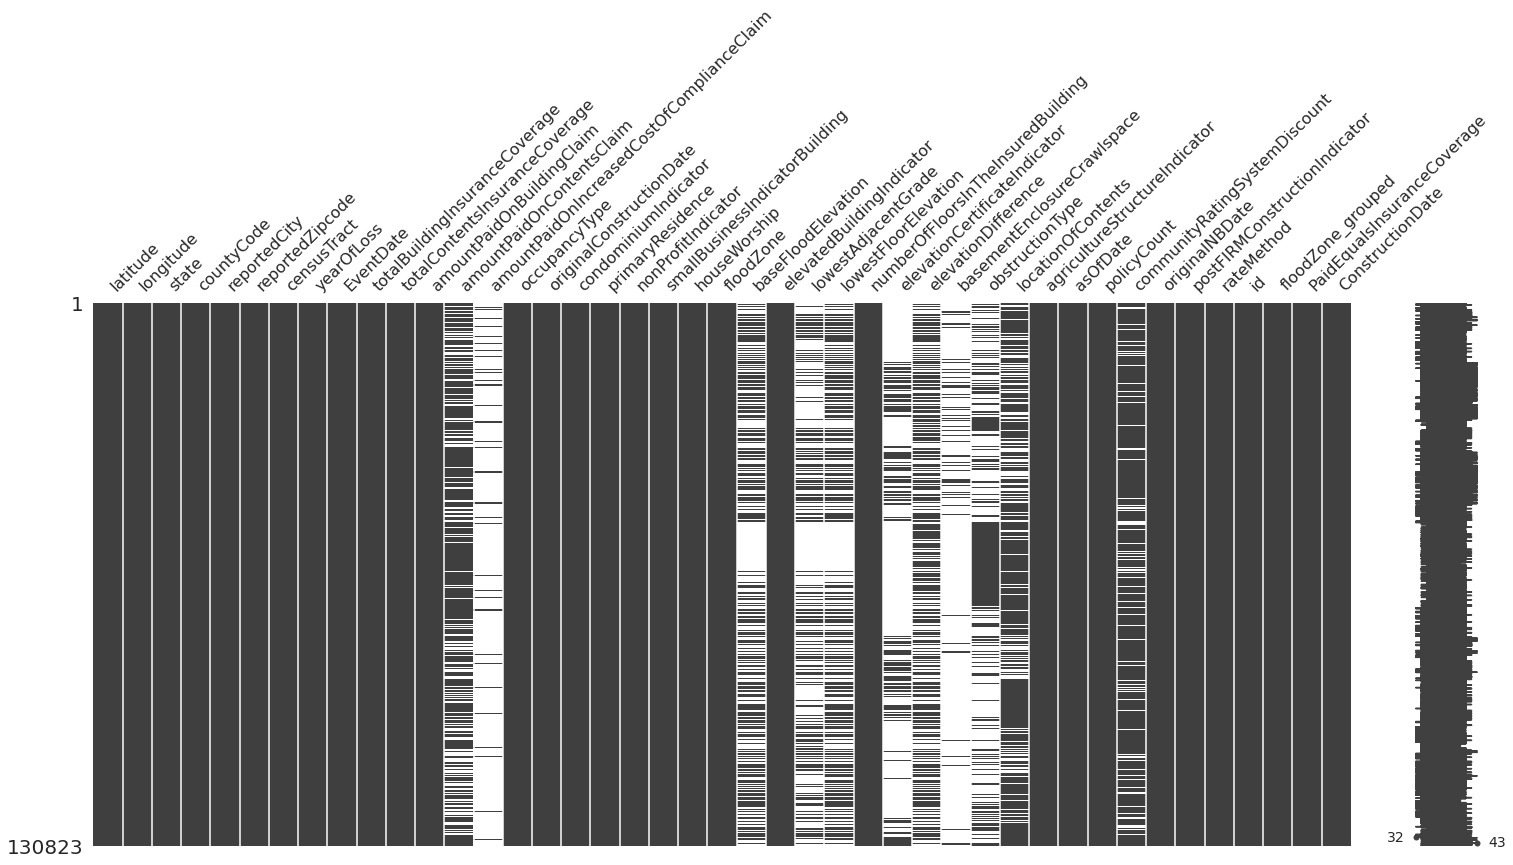

In [146]:
# Check missing values 
msno.matrix(df_Katrina)

In [147]:
df_Katrina.columns

Index(['latitude', 'longitude', 'state', 'countyCode', 'reportedCity',
       'reportedZipcode', 'censusTract', 'yearOfLoss', 'EventDate',
       'totalBuildingInsuranceCoverage', 'totalContentsInsuranceCoverage',
       'amountPaidOnBuildingClaim', 'amountPaidOnContentsClaim',
       'amountPaidOnIncreasedCostOfComplianceClaim', 'occupancyType',
       'originalConstructionDate', 'condominiumIndicator', 'primaryResidence',
       'nonProfitIndicator', 'smallBusinessIndicatorBuilding', 'houseWorship',
       'floodZone', 'baseFloodElevation', 'elevatedBuildingIndicator',
       'lowestAdjacentGrade', 'lowestFloorElevation',
       'numberOfFloorsInTheInsuredBuilding', 'elevationCertificateIndicator',
       'elevationDifference', 'basementEnclosureCrawlspace', 'obstructionType',
       'locationOfContents', 'agricultureStructureIndicator', 'asOfDate',
       'policyCount', 'communityRatingSystemDiscount', 'originalNBDate',
       'postFIRMConstructionIndicator', 'rateMethod', 'id',
   

# Select attributes for ml model

In [148]:
df_Katrina_selected = df_Katrina[['censusTract',
                                  'floodZone_grouped','baseFloodElevation', 'elevatedBuildingIndicator', 'lowestAdjacentGrade', 'lowestFloorElevation',
                                  'numberOfFloorsInTheInsuredBuilding',
                                  'totalBuildingInsuranceCoverage', 'amountPaidOnBuildingClaim']]

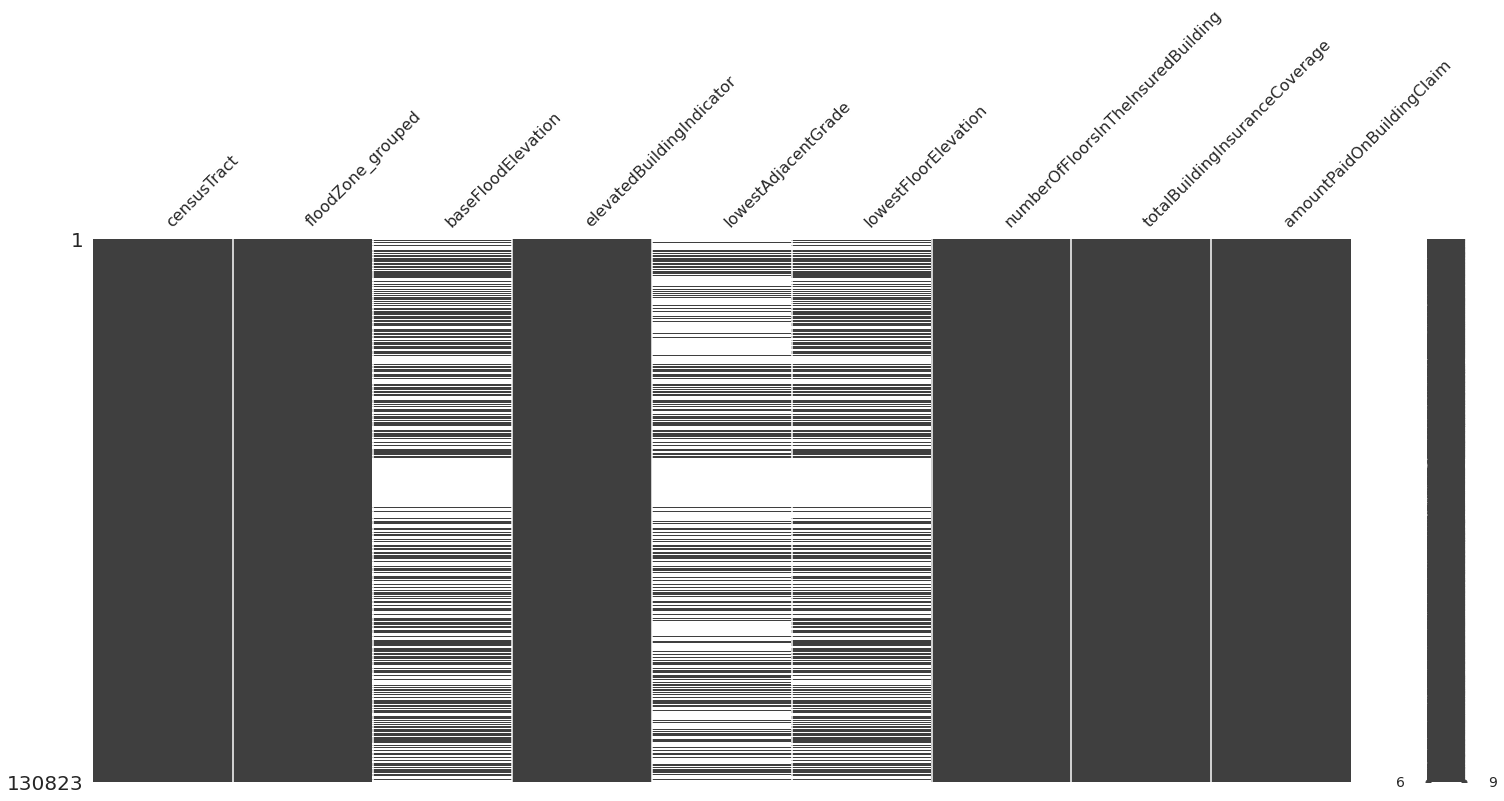

In [149]:
# Check missing values 
msno.matrix(df_Katrina_selected)

Machine Learning requires training data with non-missing values.

In [150]:
# Drop rows with missing values
df_Katrina_selected_nomissing = df_Katrina_selected.dropna(axis=0)

In [154]:
# Loss of points
lost_points = len(df_Katrina_selected) - len(df_Katrina_selected_nomissing)
remaining_points = len(df_Katrina_selected_nomissing)
print(f'Loss of {lost_points} instances, {remaining_points} instances remain.')

Loss of 91609 instances, 39214 instances remain


Signifcant loss of instances. For now continue with remaining points.

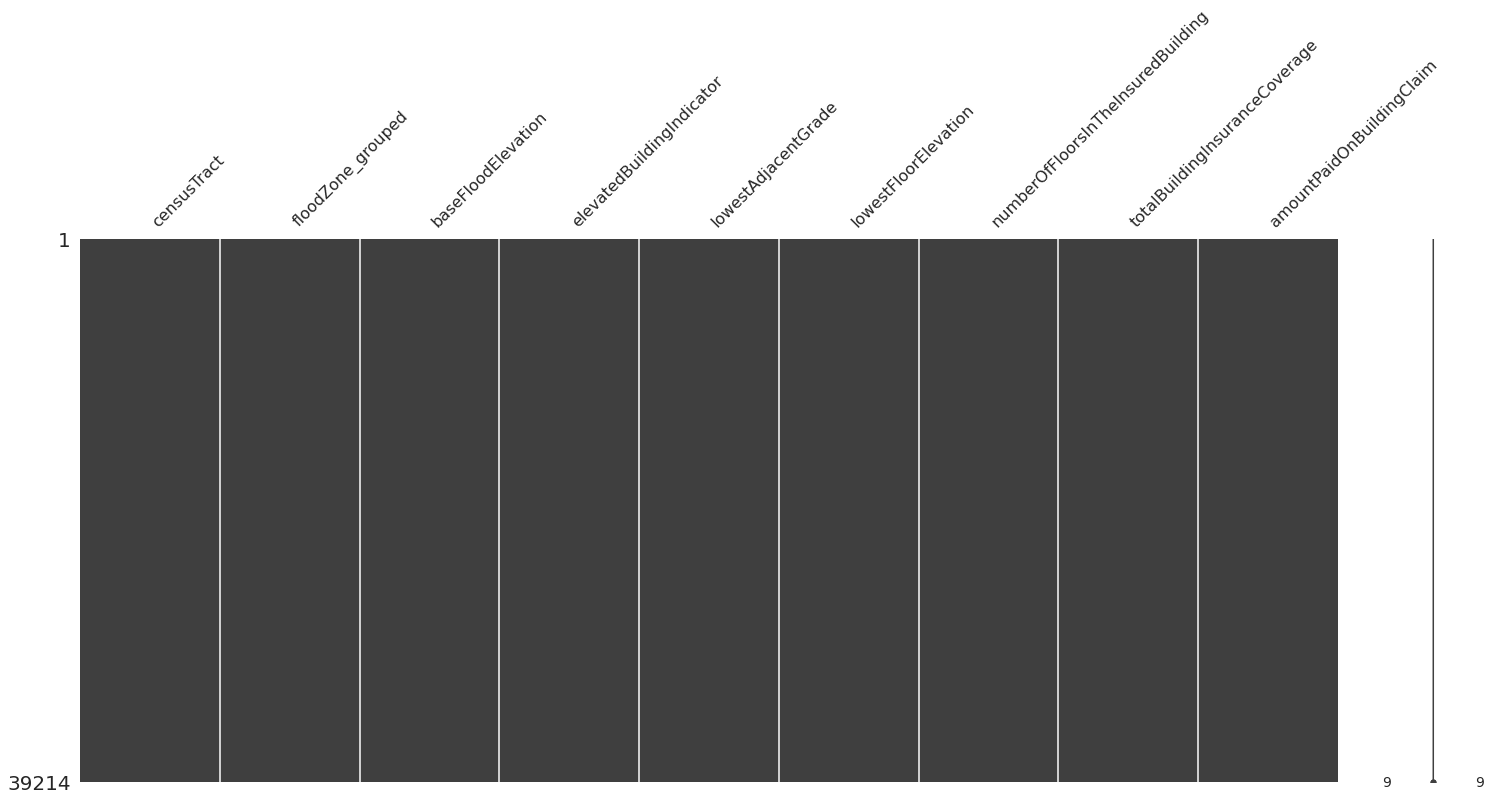

In [153]:
# Check missing values 
msno.matrix(df_Katrina_selected_nomissing)

In [156]:
df_Katrina_selected_nomissing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39214 entries, 1247 to 2427956
Data columns (total 9 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   censusTract                         39214 non-null  int64  
 1   floodZone_grouped                   39214 non-null  object 
 2   baseFloodElevation                  39214 non-null  float64
 3   elevatedBuildingIndicator           39214 non-null  float64
 4   lowestAdjacentGrade                 39214 non-null  float64
 5   lowestFloorElevation                39214 non-null  float64
 6   numberOfFloorsInTheInsuredBuilding  39214 non-null  float64
 7   totalBuildingInsuranceCoverage      39214 non-null  float64
 8   amountPaidOnBuildingClaim           39214 non-null  float64
dtypes: float64(7), int64(1), object(1)
memory usage: 3.0+ MB


In [204]:
# Key statistical values for numerical variable
df_Katrina_selected_nomissing.describe().round(2)

,censusTract,baseFloodElevation,elevatedBuildingIndicator,lowestAdjacentGrade,numberOfFloorsInTheInsuredBuilding,totalBuildingInsuranceCoverage,amountPaidOnBuildingClaim
count,3.921400e+04,39214.00,39214.00,39214.00,39214.00,39214.00,39214.00
mean,2.181614e+10,2.81,0.34,2.12,1.41,151484.56,92754.15
std,5.013721e+09,51.25,0.47,103.80,0.63,212468.27,94897.22
min,1.003011e+09,-300.00,0.00,-3411.00,1.00,0.00,15.93
25%,2.205102e+10,-3.00,0.00,-4.00,1.00,88000.00,43681.64
50%,2.207100e+10,0.00,0.00,0.00,1.00,126500.00,78700.00
75%,2.208703e+10,9.00,1.00,4.50,2.00,196000.00,121582.84
max,2.805904e+10,9990.00,1.00,9998.90,6.00,15452000.00,10000000.00


# Pairplots

In [164]:
#pairplot_01 = sns.pairplot(df_Katrina_selected_nomissing)

In [163]:
#pairplot_02 = sns.pairplot(df_Katrina_selected_nomissing, hue='floodZone_grouped')

# Looking for correlations

In [165]:
corr_matrix = df_Katrina_selected_nomissing.corr()

In [166]:
corr_matrix.style.background_gradient(cmap='coolwarm').set_precision(2)

,censusTract,baseFloodElevation,elevatedBuildingIndicator,lowestAdjacentGrade,lowestFloorElevation,numberOfFloorsInTheInsuredBuilding,totalBuildingInsuranceCoverage,amountPaidOnBuildingClaim
censusTract,1.00,-0.00,-0.13,0.00,-0.01,-0.06,-0.12,0.17
baseFloodElevation,-0.00,1.00,0.04,0.01,0.99,0.01,0.01,0.01
elevatedBuildingIndicator,-0.13,0.04,1.00,0.01,0.05,0.09,-0.01,-0.07
lowestAdjacentGrade,0.00,0.01,0.01,1.00,0.01,0.01,0.00,0.00
lowestFloorElevation,-0.01,0.99,0.05,0.01,1.00,0.01,0.01,0.01
numberOfFloorsInTheInsuredBuilding,-0.06,0.01,0.09,0.01,0.01,1.00,0.18,0.12
totalBuildingInsuranceCoverage,-0.12,0.01,-0.01,0.00,0.01,0.18,1.00,0.41
amountPaidOnBuildingClaim,0.17,0.01,-0.07,0.00,0.01,0.12,0.41,1.00


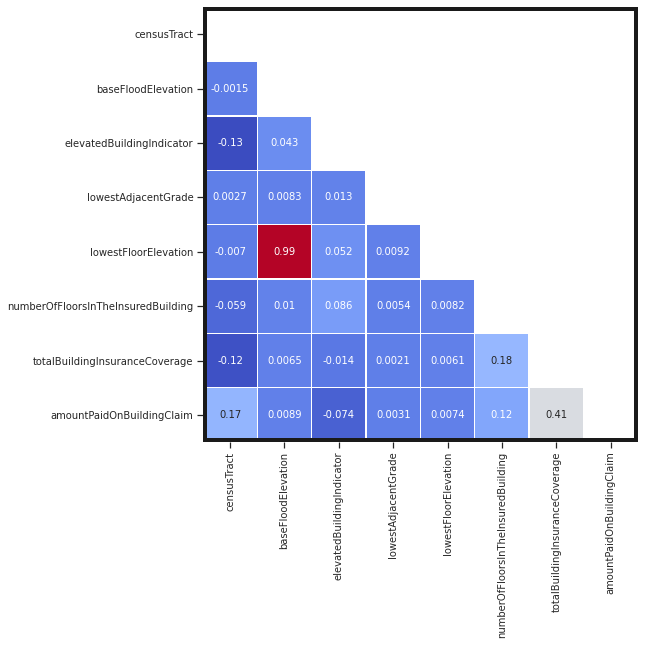

In [169]:
# Compute the correlation matrix
corr = df_Katrina_selected_nomissing.corr()

# Set up the matplotlib figure
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot()
fig.subplots_adjust()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Draw the heatmap with the mask and correct aspect ratio
correlation_matrix = sns.heatmap(corr, mask=mask, cmap='coolwarm', annot=True,
            square=True, xticklabels=True, yticklabels=True,
            linewidths=.3, cbar=None, cbar_kws={"shrink": .8}, ax=ax, annot_kws={"size": 10})

ax.axhline(y=0, color='k',linewidth=8)
ax.axhline(y=corr.shape[1], color='k',linewidth=8)
ax.axvline(x=0, color='k',linewidth=8)
ax.axvline(x=corr.shape[0], color='k',linewidth=8)

ax.set_xticklabels(ax.get_xmajorticklabels(), fontsize = 10)
ax.set_yticklabels(ax.get_ymajorticklabels(), rotation=0, fontsize = 10)

#ax.set_xlabel('Features')
#ax.set_ylabel('Features')

plt.rcParams['xtick.bottom'] = plt.rcParams['xtick.labelbottom'] = True
plt.rcParams['xtick.top'] = plt.rcParams['xtick.labeltop'] = False

ax.xaxis.set_label_position('bottom')

**Need to remove highly correlated variables**

In [172]:
# Drop lowestFloorElevation
df_Katrina_selected_nomissing.drop(labels='lowestFloorElevation', axis=1, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [173]:
df_Katrina_selected_nomissing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39214 entries, 1247 to 2427956
Data columns (total 8 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   censusTract                         39214 non-null  int64  
 1   floodZone_grouped                   39214 non-null  object 
 2   baseFloodElevation                  39214 non-null  float64
 3   elevatedBuildingIndicator           39214 non-null  float64
 4   lowestAdjacentGrade                 39214 non-null  float64
 5   numberOfFloorsInTheInsuredBuilding  39214 non-null  float64
 6   totalBuildingInsuranceCoverage      39214 non-null  float64
 7   amountPaidOnBuildingClaim           39214 non-null  float64
dtypes: float64(6), int64(1), object(1)
memory usage: 3.9+ MB


# Define X (train) and y (test) arrays

In [174]:
# Model attributes
X = df_Katrina_selected_nomissing.drop("amountPaidOnBuildingClaim", axis=1) # drop labels for training set

# target attribute
y = df_Katrina_selected_nomissing["amountPaidOnBuildingClaim"]

# Prepare the data

## Differentiate numerical features and categorical features

In [175]:
numerical_features = X.select_dtypes(include=['int64','float64']).columns
numerical_features

Index(['censusTract', 'baseFloodElevation', 'elevatedBuildingIndicator',
       'lowestAdjacentGrade', 'numberOfFloorsInTheInsuredBuilding',
       'totalBuildingInsuranceCoverage'],
      dtype='object')

In [176]:
categorical_features = X.select_dtypes(include=['object']).columns
categorical_features

Index(['floodZone_grouped'], dtype='object')

In [177]:
print("Numerical features : " + str(len(numerical_features)))
print("Categorical features : " + str(len(categorical_features)))

Numerical features : 6
Categorical features : 1


In [178]:
# Create a dataset of numerical and a dataset of categorical features
X_num = X[numerical_features]
X_cat = X[categorical_features]

## Preprocess numerical variables

In [179]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
#from sklearn.preprocessing import StandardScaler

**Min-max scaling** (many people call this normalization) is the simplest: values are shifted
and rescaled so that they end up ranging from 0 to 1. We do this by subtracting
the min value and dividing by the max minus the min. Scikit-Learn provides a transformer
called MinMaxScaler for this. It has a feature_range hyperparameter that lets
you change the range if, for some reason, you don\u2019t want 0-1.

**Standardization** is different: first it subtracts the mean value (so standardized values
always have a zero mean), and then it divides by the standard deviation so that the
resulting distribution has unit variance. Unlike min-max scaling, **standardization
does not bound values to a specific range, which may be a problem for some algorithms
(e.g., neural networks often expect an input value ranging from 0 to 1)**. However,
standardization is much less affected by outliers. For example, suppose a district
had a median income equal to 100 (by mistake). Min-max scaling would then crush
all the other values from 0-15 down to 0-0.15, whereas standardization would not be
much affected. Scikit-Learn provides a transformer called StandardScaler for
standardization.

Source: Geron, A. (2019)

In [180]:
# Feature scaling
num_pipeline = Pipeline([
        ('min_max_scaler', MinMaxScaler()),
    ])

X_num_tr = num_pipeline.fit_transform(X_num)

In [181]:
X_num_tr

array([[7.77941481e-01, 2.94460641e-02, 0.00000000e+00, 2.54364313e-01,
        0.00000000e+00, 1.05746829e-02],
       [7.78679991e-01, 2.95432459e-02, 0.00000000e+00, 2.54625314e-01,
        0.00000000e+00, 2.84752783e-02],
       [3.95475588e-09, 2.99319728e-02, 1.00000000e+00, 2.54364313e-01,
        0.00000000e+00, 7.44240228e-03],
       ...,
       [3.95475588e-09, 3.88726919e-02, 1.00000000e+00, 2.54364313e-01,
        4.00000000e-01, 1.61791354e-02],
       [7.77941644e-01, 2.90573372e-02, 1.00000000e+00, 2.54051111e-01,
        0.00000000e+00, 7.76598499e-03],
       [7.79864162e-01, 3.10009718e-02, 0.00000000e+00, 2.55728976e-01,
        0.00000000e+00, 1.02575718e-02]])

## Preprocess categorical variables

In [184]:
list(X_cat)

['floodZone_grouped']

In [185]:
X_cat.shape

(39214, 1)

In [183]:
X_cat

,floodZone_grouped
1247,A
4471,A
18819,A
21393,A
21410,A
...,...
2427615,V
2427625,V
2427648,V
2427821,A


### One-hot encoding of categorical variables

In [186]:
X_cat = pd.get_dummies(X_cat)

In [187]:
X_cat.shape

(39214, 5)

In [189]:
X_cat

,floodZone_grouped_A,floodZone_grouped_B,floodZone_grouped_C,floodZone_grouped_V,floodZone_grouped_X
1247,1,0,0,0,0
4471,1,0,0,0,0
18819,1,0,0,0,0
21393,1,0,0,0,0
21410,1,0,0,0,0
...,...,...,...,...,...
2427615,0,0,0,1,0
2427625,0,0,0,1,0
2427648,0,0,0,1,0
2427821,1,0,0,0,0


### Dropping one category for each after one-hot encoding

In [191]:
# Drop 1 features per category
X_cat = X_cat.drop(labels= ['floodZone_grouped_X'], axis=1)

In [192]:
X_cat.shape

(39214, 4)

In [193]:
X_cat

,floodZone_grouped_A,floodZone_grouped_B,floodZone_grouped_C,floodZone_grouped_V
1247,1,0,0,0
4471,1,0,0,0
18819,1,0,0,0
21393,1,0,0,0
21410,1,0,0,0
...,...,...,...,...
2427615,0,0,0,1
2427625,0,0,0,1
2427648,0,0,0,1
2427821,1,0,0,0


### Combine X_num and X_cat

In [194]:
X_num.shape

(39214, 6)

In [195]:
X_cat.shape

(39214, 4)

In [196]:
X = pd.concat([X_num,X_cat],axis=1)

In [198]:
X.shape

(39214, 10)

**Target: amountPaidOnBuildingClaim**

In [199]:
y

1247        96629.92
4471       440000.00
18819        5031.07
21393        7740.94
21410       19993.31
             ...    
2427615      7572.12
2427625    233500.00
2427648     35701.86
2427821     20857.27
2427956     22014.04
Name: amountPaidOnBuildingClaim, Length: 39214, dtype: float64

In [203]:
y.describe().round(2)

count       39214.00
mean        92754.15
std         94897.22
min            15.93
25%         43681.64
50%         78700.00
75%        121582.84
max      10000000.00
Name: amountPaidOnBuildingClaim, dtype: float64

# Export pre-processed data

In [205]:
X.shape

(39214, 10)

In [206]:
y.shape

(39214,)

In [207]:
df_processed = pd.concat([X,y], axis=1)

In [208]:
df_processed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39214 entries, 1247 to 2427956
Data columns (total 11 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   censusTract                         39214 non-null  int64  
 1   baseFloodElevation                  39214 non-null  float64
 2   elevatedBuildingIndicator           39214 non-null  float64
 3   lowestAdjacentGrade                 39214 non-null  float64
 4   numberOfFloorsInTheInsuredBuilding  39214 non-null  float64
 5   totalBuildingInsuranceCoverage      39214 non-null  float64
 6   floodZone_grouped_A                 39214 non-null  uint8  
 7   floodZone_grouped_B                 39214 non-null  uint8  
 8   floodZone_grouped_C                 39214 non-null  uint8  
 9   floodZone_grouped_V                 39214 non-null  uint8  
 10  amountPaidOnBuildingClaim           39214 non-null  float64
dtypes: float64(6), int64(1), uint8(4)
me

# Train Test Split

In [210]:
 from sklearn.model_selection import train_test_split

In [211]:
# Train 80% and Test 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [212]:
X_train.shape

(31371, 10)

In [213]:
X_test.shape

(7843, 10)

In [215]:
len(y_train)

31371

In [216]:
len(y_test)

7843

# Select and train a model

In [231]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

**Regression Evaluation Metrics**

**Mean Absolute Error** (MAE) is the mean of the absolute value of the errors:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

**Mean Squared Error** (MSE) is the mean of the squared errors:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

**Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

Comparing these metrics:

- **MAE** is  the average error.
- **MSE** is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world.
- **RMSE** is even more popular than MSE, because RMSE is interpretable in the "y" units.

All of these are **loss functions**, because we want to minimize them.

**Coefficient of determination R²**

R² score, the coefficient of determination

The r2_score function computes the coefficient of determination, usually denoted as R².

It represents the proportion of variance (of y) that has been explained by the independent variables in the model. It provides an indication of goodness of fit and therefore a measure of how well unseen samples are likely to be predicted by the model, through the proportion of explained variance.

$$R² = 1 - \frac {sum of square of residual}{sum of square of total}$$

$$R² = 1 -\frac {\sum_{i=1}^n (y_i-\hat{y}_i)^2}{\sum_{i=1}^n (y_i-\bar{y}_i)^2}$$

Best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse).

As such variance is dataset dependent, R² may not be meaningfully comparable across different datasets.

A constant model that always predicts the expected value of y, disregarding the input features, would get a R² score of 0.0.


[scikit learn documentation](https://scikit-learn.org/stable/modules/model_evaluation.html#r2-score)

## Linear regression

In [218]:
from sklearn.linear_model import LinearRegression

In [239]:
reg_LR = LinearRegression().fit(X_train, y_train)

In [240]:
reg_LR.score(X_train, y_train)

0.21673701713321136

In [241]:
reg_LR.coef_

array([ 4.14326881e-06,  1.32246817e+01, -8.16394511e+03,  1.34999667e+00,
        7.86378655e+03,  2.06258342e-01,  1.00539094e+05,  7.36323052e+04,
        2.75365521e+04,  9.85846862e+04])

In [242]:
reg_LR.intercept_

-137911.6733597205

In [243]:
reg_LR_predictions = reg_LR.predict(X_train)

In [251]:
# Mean Absolute Error (MAE)
lin_mae = mean_absolute_error(y_train, reg_LR_predictions)
lin_mae

47117.658335462744

In [249]:
#Root Mean Squared Error (RMSE)
lin_mse = mean_squared_error(y_train, reg_LR_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

85386.76759856187

## Support Vector Machine (SVM)

In [224]:
from sklearn.svm import SVR

In [228]:
reg_SVR = SVR(C=1.0, epsilon=0.2)

In [229]:
reg_SVR.fit(X_train, y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.2, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [230]:
reg_SVR.score(X_train, y_train)

-0.020698692769153704